## Lesson 6 - In Depth: Classification & Regression




### Table of Contents

* [sklearn Classification](#sklearnClassification)
* [Linear Regression](#LinearRegression)
* [EDA multiple features of data](#eda)
* [Decision Tree Regressor](#DecisionTreeRegressor)
* [Bitcoin Price Visualization](#BTCPriceVisualization)
* [Predicting Bitcoin Prices with Time Series Analysis](#BTCPricePrediction)
* [Bitcoin Linear Regression: LR Analysis](#BTCPriceLinearRegression)


<img src="images/machine_learning_essentials.png">

In [1]:
import seaborn as sns
import numpy as np
import warnings; warnings.simplefilter('ignore')
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline

<a id="sklearnClassification"></a>
## sklearn Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline

In [3]:
# Read data from csv
df_fruit = pd.read_csv("data/sklearn/fruit_data_with_colors.csv")
df_fruit.head(100)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,蘋果,翠玉蘋果,192,8.4,7.3,0.55
1,1,蘋果,翠玉蘋果,180,8.0,6.8,0.59
2,1,蘋果,翠玉蘋果,176,7.4,7.2,0.60
3,2,橘子,橘子,86,6.2,4.7,0.80
4,2,橘子,橘子,84,6.0,4.6,0.79
5,2,橘子,橘子,80,5.8,4.3,0.77
6,2,橘子,橘子,80,5.9,4.3,0.81
7,2,橘子,橘子,76,5.8,4.0,0.81
8,1,蘋果,布雷本,178,7.1,7.8,0.92
9,1,蘋果,布雷本,172,7.4,7.0,0.89


In [4]:
# 共 59 筆資料，7個 features
print(df_fruit.shape)

(59, 7)


In [5]:
# 數據集中有四種類型的水果
print(df_fruit['fruit_name'].unique())

['蘋果' '橘子' '柳橙' '檸檬']


In [6]:
# 除橘子比較少資料之外，數據還蠻平衡
print(df_fruit.groupby('fruit_name').size())

fruit_name
柳橙    19
橘子     5
檸檬    16
蘋果    19
dtype: int64


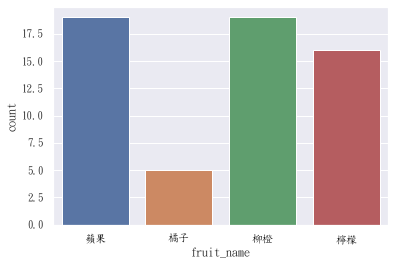

In [7]:
# 視覺化筆數差距
import seaborn as sns
sns.countplot(df_fruit['fruit_name'], label="Count")
plt.show()

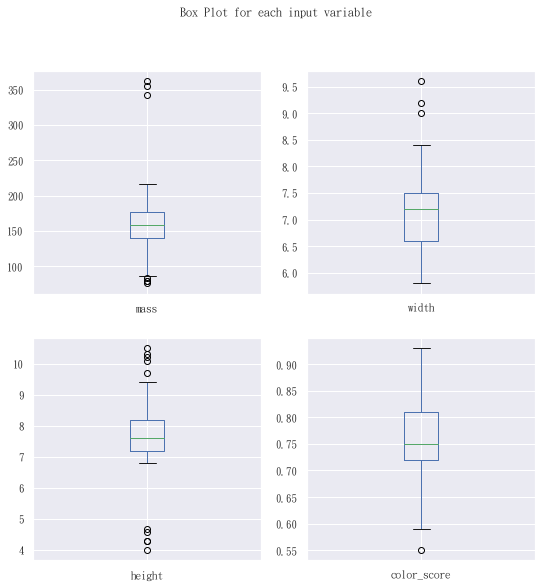

In [8]:
# 每個數值 feature 的方形分布級距
df_fruit.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('images/fruits_box')
plt.show()

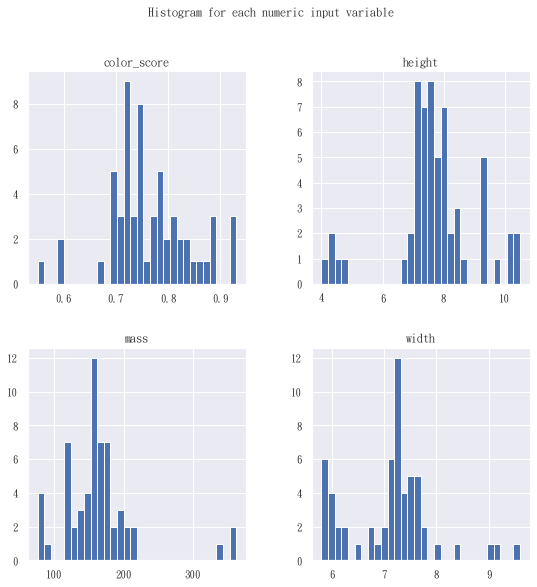

In [9]:
# 用顏色分數近似於高斯分布
import pylab as pl
df_fruit.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('images/fruits_hist')
plt.show()

In [10]:
# df_fruit.columns = [''] * len(df_fruit.columns)
# df_fruit.head()

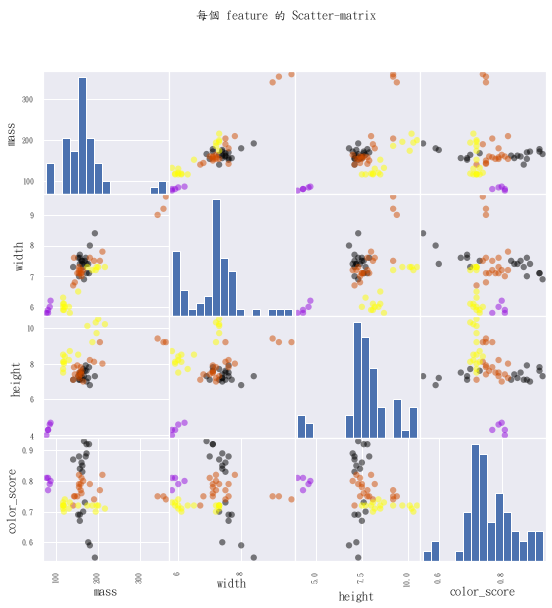

In [11]:
# 一些屬性對是相關的，舉例來說：質量和寬度的關聯程度
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", DeprecationWarning)
    
# from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = df_fruit[feature_names]
y = df_fruit['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('每個 feature 的 Scatter-matrix')
plt.savefig('images/fruits_scatter_matrix')

### LogisticRegression create training set and test set

看到訓練集沒有相同的筆數比例，因此需要對我們為訓練集計算的測試集的分配。

邏輯迴歸通常是在學分類問題 (classification) 第一個會接觸到的模型，用來建立「二元目標變數」(Binary Output Variable) 跟解釋變數之間的關係，模型形式如下：

$$
P(Y=1~|~{\rm X}) = \frac{exp({\rm {\beta}_{0}}~~{\beta}_{1}X)}{1+exp({\rm {\beta}_{0}+{\beta}_{1}X})}
$$

等號左邊是條件機率，等號右邊是乙狀函數(Sigmoid Function) 。

大家應該都知道迴歸分析 (Regression) 是建立目標變數 Y 與解釋變數 X 間的關係，更嚴謹一點的說法是「給定一個固定的解釋變數 X，目標變數 Y 的平均值是多少？」也就是「條件期望值 (Conditional Expectaion)」的概念：試著以線性結構去逼近
$$\mathbb{E}(Y|X)$$
既然屬於迴歸的一種，為什麼邏輯迴歸是「機率」為建模對象，而不是期望值呢？

其實，邏輯迴歸也是針對條件期望值進行建模的，我們知道邏輯迴歸裡面的目標變數 Y 是一個二元變數，其中 Y=1 的機率是
$$\mathbb{P}(Y=1)$$
Y=0 的機率是
$$\mathbb{P}(Y=0)$$
因此可以推得條件期望值
$$\mathbb{E}(Y|X) = 1 \cdot \mathbb{P}(Y=1|X)+ 0 \cdot \mathbb{P}(Y=0|X)=\mathbb{P}(Y=1|X)$$
也就是說，其實邏輯迴歸還是建立目標變數 Y 的平均值與解釋變數 X 間的關係，只是 Y 的平均值剛好跟
$$latex Y = 1$$
的機率是一樣的。

### 為什麼是乙狀函數 (Sigmoid Function) ?

邏輯迴歸 (Logistic Regression)，一直有一個很大的疑惑：到底為什麼會跑出來乙狀函數 (Sigmoid Function) 呢？ 因為乙狀函數是落在 (0,1) 之間，符合邏輯迴歸針對機率建模的特性，而且可以微分，但最大的疑問是：那為什麼不選
$$sin^2 x$$
為什麼偏偏就是乙狀函數呢？

因為目前要分析的是，透過水果的大小、質量、顏色來判斷是某樣水果Y的機率，那麼在不同的X排列組合下，有可能出線機率大於1或小於0的情況，此時就必須用Sigmoid Function來表達模型機率，介於0至1之間，但中間有一些區段（機率上升段）剛好是只靠特徵沒辦法完全捕捉的區段，這樣做使之符合現實情況。

In [12]:
X.values[:3]

array([[192.  ,   8.4 ,   7.3 ,   0.55],
       [180.  ,   8.  ,   6.8 ,   0.59],
       [176.  ,   7.4 ,   7.2 ,   0.6 ]])

In [13]:
y.values[:3]

array([1, 1, 1], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=0)

In [15]:
X_train[:3]

array([[154.  ,   7.2 ,   7.2 ,   0.82],
       [174.  ,   7.3 ,  10.1 ,   0.72],
       [ 76.  ,   5.8 ,   4.  ,   0.81]])

In [16]:
y_train

array([3, 4, 2, 1, 3, 4, 3, 3, 4, 1, 4, 3, 1, 2, 3, 1, 4, 1, 4, 1, 1, 3,
       1, 4, 4, 4, 3, 1, 1, 4, 3, 2, 1, 3, 1, 1, 1, 3, 4, 2, 1, 4, 4, 4],
      dtype=int64)

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
# logistic_model = logreg.fit(X_train, y_train)
logistic_model = logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.47


- Logistic回歸分類器在訓練集上的準確率:0.82
- Logistic回歸分類器在測試集上的準確率:0.47

In [18]:
logistic_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
data = [[192, 8.4, 7.3, 0.55]]
data = [[342,9.0,9.4,0.75]]
# data = [[116,5.9,8.1,0.73]]
data = np.array(data).astype(np.float)
predict_result = logistic_model.predict_proba(data)
predict_result

array([[2.88926526e-01, 1.50150348e-09, 7.11056353e-01, 1.71191454e-05]])

In [20]:
class_label = {
    0:'蘋果',
    1:'橘子',
    2:'柳橙',
    3:'檸檬'
}
top4 = predict_result.argsort()[-4:][::-1]
def predict(predict_result):
    ps = []
    for i in class_label:
        ps.append({class_label[i]:predict_result[0][i]})
    return predict_result.argmax(), class_label[predict_result.argmax()], ps
# print('Ensamble: {}'.format(class_label[predict_result.argmax()]))

print(predict(predict_result))

(2, '柳橙', [{'蘋果': 0.28892652649511147}, {'橘子': 1.5015034784224618e-09}, {'柳橙': 0.7110563528579671}, {'檸檬': 1.7119145418013527e-05}])


### Save LogisticRegression model

In [21]:
import pickle
with open('model/LogisticRegression/model_fruit_classifier.pkl', 'wb') as handle:
    pickle.dump(logistic_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load LogisticRegression model

In [22]:
import pickle
with open('model/LogisticRegression/model_fruit_classifier.pkl', 'rb') as handle:
    logistic_model = pickle.load(handle)

In [23]:
class_label = {
    0:'蘋果',
    1:'橘子',
    2:'柳橙',
    3:'檸檬'
}

def predict_logistic_regression(logistic_model, test_data, class_label):
    test_data = np.array(test_data).astype(np.float)
    predict_result = logistic_model.predict_proba(test_data)
    top4 = predict_result.argsort()[-4:][::-1]
    ps = []
    for i in class_label:
        ps.append({class_label[i]:predict_result[0][i]})
    # print('Ensamble: {}'.format(class_label[predict_result.argmax()]))
    return predict_result.argmax(), class_label[predict_result.argmax()], ps

In [24]:
# lemon
test_data = [[116,5.9,8.1,0.73]]
print(predict_logistic_regression(logistic_model, test_data, class_label))

(3, '檸檬', [{'蘋果': 0.10614415182366849}, {'橘子': 0.03050340982636524}, {'柳橙': 0.04725083668609097}, {'檸檬': 0.8161016016638752}])


### DecisionTreeClassifier

決策樹是一種解決分類問題的算法，其樹形結構，使用層層投票來實現最終的分類。決策樹由下面幾種元素構成：

- 根節點：包含樣本的全集
- 內部節點：對應特徵屬性測試
- 葉節點：代表決策的結果

預測時，在樹的內部節點處用某一屬性值進行判斷，根據判斷結果決定進入哪個分支節點，直到到達葉節點處，得到分類結果。

這是一種基於 if-then-else 規則的有監督學習算法，決策樹的這些規則通過訓練得到，而不是人工制定的。

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}' .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


- 決策樹分類器在訓練集上的準確率:1.00
- 決策樹分類器在測試集上的準確率:0.73

In [26]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
y_predict = clf.predict(X_test)
y_predict
# accuracy_score(y_test, y_predict)

array([3, 3, 4, 1, 1, 1, 1, 3, 3, 1, 2, 1, 3, 4, 4], dtype=int64)

In [28]:
# Lemon
test_data = [[116,5.9,8.1,0.73]]
clf.predict(test_data)

array([4], dtype=int64)

### Save DecisionTreeClassifier model

In [29]:
import pickle
with open('model/DecisionTreeClassifier/model_fruit_classifier.pkl', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load DecisionTreeClassifier model

In [30]:
import pickle
with open('model/DecisionTreeClassifier/model_fruit_classifier.pkl', 'rb') as handle:
    decision_tree_model = pickle.load(handle)

In [31]:
class_label = {
    1:'蘋果',
    2:'橘子',
    3:'柳橙',
    4:'檸檬'
}

In [32]:
def predict_decision_tree_classifier(decision_tree_model, test_data, class_label):
    test_data = np.array(test_data).astype(np.float)
    predict_result = decision_tree_model.predict(test_data)
    #predict_result
    ps = []
    return predict_result[0], class_label[predict_result[0]]

In [33]:
# Orange
test_data = [[84,6.0,4.6,0.79]]
predict_decision_tree_classifier(decision_tree_model, test_data, class_label)

(2, '橘子')

### K-Nearest Neighbors

KNN演算法全名為「k nearest neighbor」，翻成中文意思就是「k個最近的鄰居」，在水果的模型中，顏色為橘色、大小為一隻手掌大小，和此特徵最接近的水果，就是KNN的邏輯。

簡單來說，kNN做的事情就是，假設欲預測點是 i，找出離 i最近的 k 筆資料多數是哪一類，預測 i 的類型

```
Given a test instance i, find the k closest neighbors and their labels
Predict i’s label as the majority of the labels of the k nearest neighbors
```

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.53


- K-NN分類器在訓練集上的準確率:0.80
- K-NN分類器在測試集上的準確率:0.53

In [35]:
# Lemon
test_data = [[118,6.1,8.1,0.70]]
knn.predict(test_data)

array([4], dtype=int64)

### Save K-Nearest Neighbors model

In [36]:
import pickle
with open('model/KNearestNeighbors/model_fruit_classifier.pkl', 'wb') as handle:
    pickle.dump(knn, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load K-Nearest Neighbors model

In [37]:
import pickle
with open('model/KNearestNeighbors/model_fruit_classifier.pkl', 'rb') as handle:
    knn_model = pickle.load(handle)

In [38]:
class_label = {
    1:'蘋果',
    2:'橘子',
    3:'柳橙',
    4:'檸檬'
}

In [39]:
def predict_knn_classifier(knn_model, test_data, class_label):
    test_data = np.array(test_data).astype(np.float)
    predict_result = knn_model.predict(test_data)
    predict_result
    ps = []
    return predict_result[0], class_label[predict_result[0]]

In [40]:
# Orange
test_data = [[84,6.0,4.6,0.79]]
predict_knn_classifier(knn_model, test_data, class_label)

(2, '橘子')

### 線性判別分析

LDA(Linear Discriminant Analysis)在分類的判斷準則理論，是監督式學習(參數學習)，在演算法上基本假設是資料分佈是高斯密度分佈(Gaussian density distribution)，所以在MAP的概似函數部份
$$(p(x|wi)$$
LDA會假設為高斯分佈。

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}' .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


- LDA分類器在訓練集上的準確率:0.86
- LDA分類器在測試集上的準確率:0.67

In [42]:
# Lemon
test_data = [[118,6.1,8.1,0.70]]
lda.predict(test_data)

array([4], dtype=int64)

### Save Discriminant Analysis model

In [43]:
import pickle
with open('model/DiscriminantAnalysis/model_fruit_classifier.pkl', 'wb') as handle:
    pickle.dump(lda, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Discriminant Analysis model

In [44]:
import pickle
with open('model/KNearestNeighbors/model_fruit_classifier.pkl', 'rb') as handle:
    lda_model = pickle.load(handle)

In [45]:
class_label = {
    1:'蘋果',
    2:'橘子',
    3:'柳橙',
    4:'檸檬'
}

In [46]:
def predict_lda_classifier(lda_model, test_data, class_label):
    test_data = np.array(test_data).astype(np.float)
    predict_result = lda_model.predict(test_data)
    predict_result
    ps = []
    return predict_result[0], class_label[predict_result[0]]

In [47]:
# Orange
test_data = [[84,6.0,4.6,0.79]]
predict_knn_classifier(lda_model, test_data, class_label)

(2, '橘子')

### 高斯樸素貝葉斯

貝氏分類器(Naive Bayes Classification)，該分類器模型在20世紀60年代初引入文本資料信息檢索中，文本資料分類的做法式將詞語出現的頻率用特徵值表示：

<img src="https://chart.googleapis.com/chart?cht=tx&chl=P(L~%7C~features)%20%3D%20P(features~%7C~L)*P(L)%2FP(feature)">

如果試圖在兩個標籤之間做出決策，可以利用類別1(L1)與類別2(L2)的方式計算出，並且可以計算出每個類別的都可以用此方式計算出比率：

<img src="https://chart.googleapis.com/chart?cht=tx&chl=P(L1~%7C~features)%2FP(L2~%7C~features)%20%3D%20P(features~%7C~L1)*P(L1)%2FP(features~%7C~L2)*P(L2)">

貝氏分類器中的"naive"指的是，我們對每個標籤的生成模型做原是的假設，然後對模型中的每個類別做大約估計，不同類型的數據假設依賴於不同類型的貝氏分類器，首先匯入需要的函式庫和資料集，其中在貝氏分類器中，假設來自每個標籤的數據是從簡單的`高斯分佈`中提取的。

In [48]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [49]:
# Lemon
test_data = [[118,6.1,8.1,0.70]]
gnb.predict(test_data)

array([4], dtype=int64)

- GNB分類器在訓練集上的準確率:0.86
- GNB分類器在測試集上的準確率:0.67

### Save Naive Bayes model

In [50]:
import pickle
with open('model/NaiveBayes/model_fruit_classifier.pkl', 'wb') as handle:
    pickle.dump(gnb, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Naive Bayes model

In [51]:
import pickle
with open('model/NaiveBayes/model_fruit_classifier.pkl', 'rb') as handle:
    gnb_model = pickle.load(handle)

In [52]:
class_label = {
    1:'蘋果',
    2:'橘子',
    3:'柳橙',
    4:'檸檬'
}

In [53]:
def predict_gnb_classifier(gnb_model, test_data, class_label):
    test_data = np.array(test_data).astype(np.float)
    predict_result = gnb_model.predict(test_data)
    predict_result
    ps = []
    return predict_result[0], class_label[predict_result[0]]

In [54]:
# Orange
test_data = [[84,6.0,4.6,0.79]]
predict_gnb_classifier(gnb_model, test_data, class_label)

(2, '橘子')

### Support Vector Machines classifier

SVM是怎麼得到那條很好的線(模型)呢？以直線來說，首先紅色的線會創造兩條黑色平行於紅色線的虛線，並讓黑線平移碰到最近的一個點，紅線到黑線的距離稱為Margin，而SVM就是透過去找Margin最大的那個紅線，來找最好的線。

In [55]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}' .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.47


- SVM 支持向量分類器在訓練集上的準確率:0.91
- SVM 支持向量分類器在測試集上的準確率:0.47

In [56]:
# Lemon
test_data = [[118,6.1,8.1,0.70]]
svm.predict(test_data)

array([4], dtype=int64)

### Save Support Vector model

In [57]:
import pickle
with open('model/SupportVector/model_fruit_classifier.pkl', 'wb') as handle:
    pickle.dump(svm, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Support Vector model

In [58]:
import pickle
with open('model/SupportVector/model_fruit_classifier.pkl', 'rb') as handle:
    svm_model = pickle.load(handle)

In [59]:
class_label = {
    1:'蘋果',
    2:'橘子',
    3:'柳橙',
    4:'檸檬'
}

In [60]:
def predict_svm_classifier(svm_model, test_data, class_label):
    test_data = np.array(test_data).astype(np.float)
    predict_result = svm_model.predict(test_data)
    predict_result
    ps = []
    return predict_result[0], class_label[predict_result[0]]

In [61]:
# Orange => Error
test_data = [[84,6.0,4.6,0.79]]
t1 = predict_svm_classifier(svm_model, test_data, class_label)
print(t1)

# Orange => Correct
test_data = [[158,7.2,7.8,0.77]]
t2 = predict_svm_classifier(svm_model, test_data, class_label)
print(t2)

(1, '蘋果')
(3, '柳橙')


### 測試集的混淆矩陣，比較小資料集時，哪一個模型比較準

混淆矩陣嵾考機器學習中TP, TN, FP, FN等四個指標繪製的矩陣，無論分類問題是二分類問題還是多分類問題，混淆矩陣可以以評估機器學習的表現計算。當分類的結果多於兩種的時候，混淆矩陣同時適用。

- precision 越高越好
- recall 越高越好

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = logistic_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2 0 2 0]
 [0 1 0 0]
 [5 0 2 1]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.29      0.50      0.36         4
           2       1.00      1.00      1.00         1
           3       0.50      0.25      0.33         8
           4       0.67      1.00      0.80         2

    accuracy                           0.47        15
   macro avg       0.61      0.69      0.62        15
weighted avg       0.50      0.47      0.45        15



In [63]:
pred = decision_tree_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 4 2]
 [0 0 1 1]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       0.80      0.50      0.62         8
           4       0.33      0.50      0.40         2

    accuracy                           0.67        15
   macro avg       0.70      0.75      0.70        15
weighted avg       0.72      0.67      0.66        15



In [64]:
pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]
              precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       1.00      1.00      1.00         1
           3       0.75      0.38      0.50         8
           4       0.25      0.50      0.33         2

    accuracy                           0.53        15
   macro avg       0.62      0.66      0.61        15
weighted avg       0.63      0.53      0.54        15



In [65]:
pred = lda_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]
              precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       1.00      1.00      1.00         1
           3       0.75      0.38      0.50         8
           4       0.25      0.50      0.33         2

    accuracy                           0.53        15
   macro avg       0.62      0.66      0.61        15
weighted avg       0.63      0.53      0.54        15



In [66]:
pred = gnb_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [4 0 3 1]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       1.00      1.00      1.00         1
           3       1.00      0.38      0.55         8
           4       0.67      1.00      0.80         2

    accuracy                           0.67        15
   macro avg       0.79      0.84      0.75        15
weighted avg       0.82      0.67      0.64        15



In [67]:
pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [1 0 0 0]
 [6 0 2 0]
 [1 0 0 1]]
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         4
           2       0.00      0.00      0.00         1
           3       1.00      0.25      0.40         8
           4       1.00      0.50      0.67         2

    accuracy                           0.47        15
   macro avg       0.58      0.44      0.39        15
weighted avg       0.76      0.47      0.44        15



In [68]:
from sklearn.linear_model import Ridge, Lasso

linreg = Ridge(alpha=20.0)
linreg_model = linreg.fit(X_train, y_train)
linreg_model

Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
linreg.score(X_train, y_train)

0.5242172091657273

In [70]:
linreg.score(X_test, y_test)

0.3121005478503116

### 繪製k-NN分類器的決策邊界

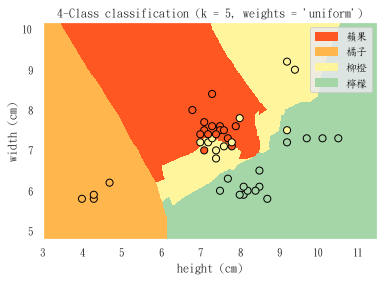

In [71]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

X = df_fruit[['mass', 'width', 'height', 'color_score']]
y = df_fruit['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
    # Create color maps
    cmap_light = ListedColormap(['#FF5722', '#FFB74D', '#FFF59D','#A5D6A7'])
    cmap_bold  = ListedColormap(['#FF5722', '#FFB74D', '#FFF59D','#A5D6A7'])
    #clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF5722', label='蘋果')
    patch1 = mpatches.Patch(color='#FFB74D', label='橘子')
    patch2 = mpatches.Patch(color='#FFF59D', label='柳橙')
    patch3 = mpatches.Patch(color='#A5D6A7', label='檸檬')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')

    n_neighbors = 5
    weights = 'uniform'
    plt.title("4-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))
    plt.show()

plot_fruit_knn(X_train, y_train, 5, 'uniform')

([<matplotlib.axis.XTick at 0x14193a323c8>,
 <a list of 5 Text xticklabel objects>)

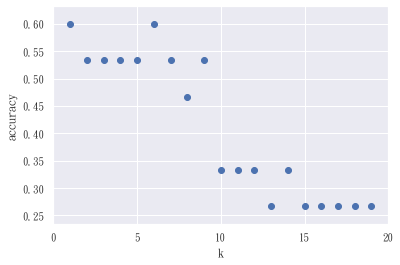

In [72]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

#### Summary

In this session, we focused on the prediction accuracy. Our objective is to learn a model that has a good generalization performance. Such a model maximizes the prediction accuracy. We identified the machine learning algorithm that is best-suited for the problem at hand (i.e. fruit types classification); therefore, we compared different algorithms and selected the best-performing one.

Source code that created this post can be found here. I would be pleased to receive feedback or questions on any of the above.

<a id="LinearRegression"></a>
## Linear Regression

In [73]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [74]:
dataset = pd.read_csv('data/sklearn/LinearRegression_footage.csv')
dataset.head()

,坪數,單價(萬元)
0,32.5,21
1,35.1,47
2,33.2,27
3,38.5,75
4,33.5,30


In [75]:
dataset["坪數"].values

array([32.5, 35.1, 33.2, 38.5, 33.5, 31.5, 39.2, 35.5, 38.3, 32.7, 37.7,
       35.9, 34.5, 33.3, 31.1, 38.9, 32.5, 31.9, 36.1, 37.4, 32.7, 34.8,
       33.8, 36.9, 37.8])

In [76]:
dataset["單價(萬元)"].values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [77]:
dataset.size

50

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())

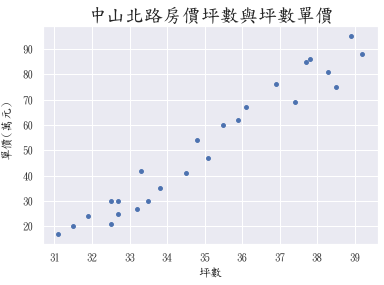

In [79]:
x_list = dataset["坪數"].values
y_list = dataset["單價(萬元)"].values

plt.title("中山北路房價坪數與坪數單價", fontsize=19)
plt.xlabel('坪數')
plt.ylabel('單價(萬元)')
plt.scatter(x_list, y_list, s=15)

In [80]:
# preprocessing
X = dataset.iloc[:, :1].values
Y = dataset.iloc[:, 1].values

In [81]:
X[:3]

array([[32.5],
       [35.1],
       [33.2]])

In [82]:
Y[:3]

array([21, 47, 27], dtype=int64)

In [83]:
# 將全部資料區分為訓練集與測試集，比例為3:1
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0)

In [84]:
X_train[:1]

array([[37.8]])

In [85]:
Y_train[:1]

array([86], dtype=int64)

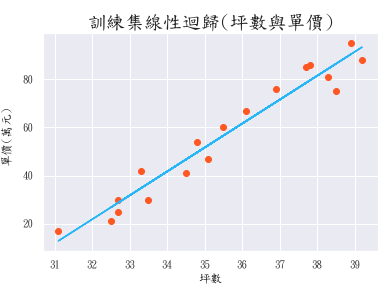

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

plt.title("訓練集線性迴歸(坪數與單價)", fontsize=19)
plt.xlabel('坪數')
plt.ylabel('單價(萬元)')

plt.scatter(X_train , Y_train, color = '#FF5722')
plt.plot(X_train , regressor.predict(X_train), color ='#29B6F6')
plt.show()

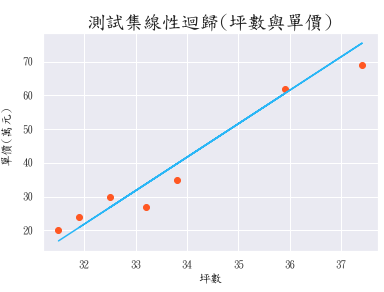

In [87]:
plt.title("測試集線性迴歸(坪數與單價)", fontsize=19)
plt.xlabel('坪數')
plt.ylabel('單價(萬元)')
plt.scatter(X_test , Y_test, color = '#FF5722')
plt.plot(X_test , regressor.predict(X_test), color ='#29B6F6')
plt.show()
# 模型在測試集上的擬合程度還不錯

In [88]:
# 測試單筆資料
import numpy as np
import pandas as pd

# 將 list  32.1 作為欲購買的坪數
test_subject = [32.1]
d_test = pd.DataFrame(test_subject)
test_subject = d_test.iloc[:, :1].values
print("坪數:{}".format(test_subject))
# 預測 購買32.1坪的房子，預測一坪為22萬元
regressor.predict(test_subject)

坪數:[[32.1]]


array([22.80972877])

In [89]:
# 預測 購買大一點為 35.1坪(多3坪)，預測一坪要多少錢
test_subject = [35.1]
d_test = pd.DataFrame(test_subject)
test_subject = d_test.iloc[:, :1].values
regressor.predict(test_subject)

array([52.63476378])

### Save Linear Regression model

In [90]:
import pickle
with open('model/LinearRegression/model_simple_house_price.pkl', 'wb') as handle:
    pickle.dump(regressor, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Linear Regression model

In [91]:
import pickle
with open('model/LinearRegression/model_simple_house_price.pkl', 'rb') as handle:
    regressor_model = pickle.load(handle)

In [92]:
# 60坪的房子，預測一坪要多少錢
test_subject = [60.0]
d_test = pd.DataFrame(test_subject)
test_subject = d_test.iloc[:, :1].values
regressor_model.predict(test_subject)

array([300.18255444])

### 以房價 (坪數x每坪單價)算出，再計算一次

In [93]:
dataset = pd.read_csv('data/sklearn/LinearRegression_footage.csv')
dataset.head(1)

,坪數,單價(萬元)
0,32.5,21


In [94]:
dataset["房價"] = dataset["坪數"]*dataset["單價(萬元)"]
dataset.head(3)

,坪數,單價(萬元),房價
0,32.5,21,682.5
1,35.1,47,1649.7
2,33.2,27,896.4


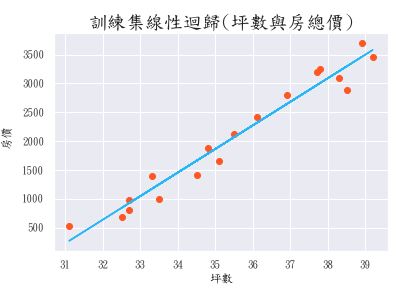

In [95]:
X = dataset.iloc[:, :1].values
Y = dataset.iloc[:, 2].values  # 注意：已修改為第三欄位，房價
# 將全部資料區分為訓練集與測試集，比例為3:1
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

plt.title("訓練集線性迴歸(坪數與房總價)", fontsize=19)
plt.xlabel('坪數')
plt.ylabel('房價')

plt.scatter(X_train , Y_train, color = '#FF5722')
plt.plot(X_train , regressor.predict(X_train), color ='#29B6F6')
plt.show()

In [96]:
# 將 list  32.1 作為欲購買的坪數
test_subject = [32.1]
d_test = pd.DataFrame(test_subject)
test_subject = d_test.iloc[:, :1].values
print("坪數:{}".format(test_subject))
# 預測 購買32.1坪的房子，總價為683萬元
print("總價:{}".format(regressor.predict(test_subject)))

坪數:[[32.1]]
總價:[683.14883586]


In [97]:
# 預測 購買大一點為 35.1坪(多3坪)，預測一坪要多少錢
test_subject = [35.1]
d_test = pd.DataFrame(test_subject)
test_subject = d_test.iloc[:, :1].values
print("坪數:{}".format(test_subject))
# 預測 購買32.1坪的房子，總價將高達1906萬元
print("總價:{}".format(regressor.predict(test_subject)))

坪數:[[35.1]]
總價:[1906.80238991]


<a id="eda"></a>
## EDA multiple features of data

### 台北市大安區房屋實價登錄分析

資料來源：https://lvr.land.moi.gov.tw/homePage.action

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 大安區
data = pd.read_csv("data/sklearn/LinearRegression_footage_tw.csv")
data.head()

,編號,地址,交易月年,總價(萬),單價(萬/坪),總面積(坪),型態,樓別,樓高
0,1,羅斯福路二段91~120號,108/6,4000,98.3,40.70,住宅大樓(11層含以上有電梯),2,15/15
1,2,新生南路三段1~30號,108/6,1336,80.0,16.70,住宅大樓(11層含以上有電梯),0,11/14
2,3,和平東路三段1巷26弄1~30號,108/6,2360,70.2,33.64,住宅大樓(11層含以上有電梯),34,8/17
3,4,師大路93巷1~30號,108/6,1432,49.0,29.26,公寓(5樓含以下無電梯),0,3/4
4,5,建國南路一段331~360號,108/6,2250,80.4,27.99,住宅大樓(11層含以上有電梯),12,10/12


In [99]:
if '編號' in data.columns:
    del data['編號']
data.head(1)

,地址,交易月年,總價(萬),單價(萬/坪),總面積(坪),型態,樓別,樓高
0,羅斯福路二段91~120號,108/6,4000,98.3,40.7,住宅大樓(11層含以上有電梯),2,15/15


In [100]:
data.describe()

,總價(萬),單價(萬/坪),總面積(坪),樓別
count,200.000000,199.000000,200.000000,200.000000
mean,3184.560000,82.447236,37.798500,18.840000
std,5372.916893,23.586683,45.801511,16.868227
min,220.000000,20.300000,3.750000,0.000000
25%,1239.500000,70.350000,14.420000,0.000000
50%,2200.000000,81.400000,30.150000,15.000000
75%,3276.000000,96.200000,41.105000,34.000000
max,60568.000000,204.900000,410.600000,51.000000


In [101]:
print ("資料集筆數："+ str(len(data)))

資料集筆數：200


In [102]:
#資料中為Null統計
data.isnull().sum()

地址         0
交易月年       0
總價(萬)      0
單價(萬/坪)    1
總面積(坪)     0
型態         0
樓別         0
樓高         0
dtype: int64

In [103]:
#清洗單價為空的資料
data = data[np.isfinite(data["單價(萬/坪)"])]

In [104]:
# 再確認一次沒有空值的資料
data.isnull().sum()

地址         0
交易月年       0
總價(萬)      0
單價(萬/坪)    0
總面積(坪)     0
型態         0
樓別         0
樓高         0
dtype: int64

In [105]:
# 檢查有無重複資料
(data.duplicated()).sum()

2

In [106]:
# 刪除重複資料
data = data.drop_duplicates()

In [107]:
data.isnull().sum()

地址         0
交易月年       0
總價(萬)      0
單價(萬/坪)    0
總面積(坪)     0
型態         0
樓別         0
樓高         0
dtype: int64

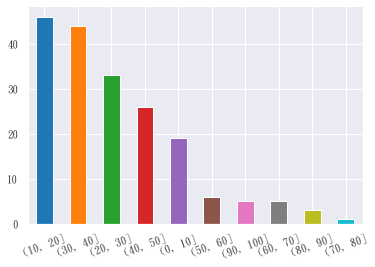

In [108]:
# 依據物件坪數大小統計
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
bins = [0,10,20,30,40,50,60,70,80,90,100]
pd.cut(data["總面積(坪)"],bins).value_counts().plot.bar(rot = 20, color=colors)

In [109]:
# 房屋型態與成交價進行比較
data.groupby(['型態'])['總價(萬)'].sum()

型態
住宅大樓(11層含以上有電梯)    329304
公寓(5樓含以下無電梯)        88879
其他                   5105
套房(1房(1廳)1衛)        31428
店面（店舖)              15960
華廈(10層含以下有電梯)      112681
辦公商業大樓              48605
Name: 總價(萬), dtype: int64

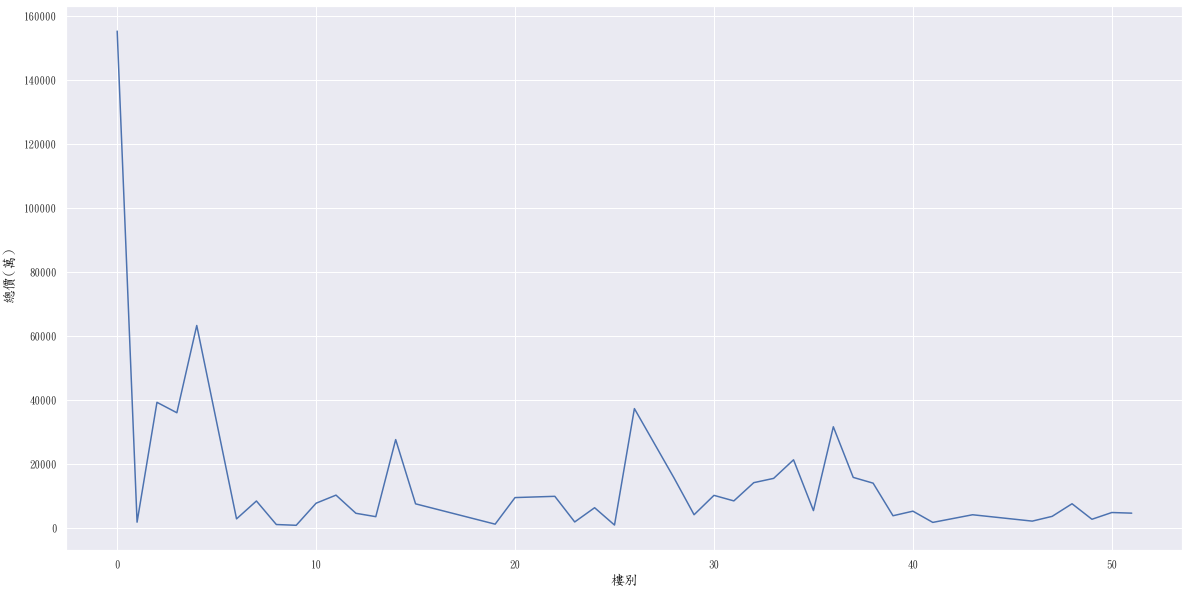

In [110]:
# 對樓別與成交價進行比較折線圖
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)

plt.rcParams['font.sans-serif']=['SimHei']   # 用黑體顯示中文
plt.rcParams['axes.unicode_minus']=False     # 正常顯示負號

fig = plt.figure(figsize = (20, 10))
# plt.xticks(ratation=90)
#plt.yticks(data['總價(萬)'].sum())
data_graph = data.groupby(['樓別'])['總價(萬)'].sum()
plt.xlabel("樓別", fontproperties=font)
plt.ylabel("總價(萬)", fontproperties=font)
plt.plot(data_graph)
plt.show()

In [111]:
data['型態'].value_counts()

住宅大樓(11層含以上有電梯)    74
公寓(5樓含以下無電梯)       43
華廈(10層含以下有電梯)      39
套房(1房(1廳)1衛)       26
辦公商業大樓              8
店面（店舖)              5
其他                  2
Name: 型態, dtype: int64

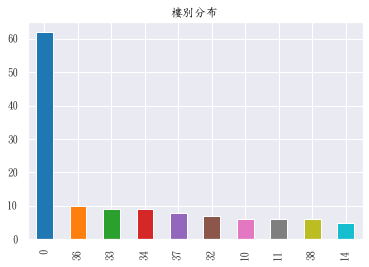

In [112]:
housetype = data['樓別'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
housetype.head(10).plot(kind='bar',x=housetype,y='size', title='樓別分布', color=colors)
plt.show()

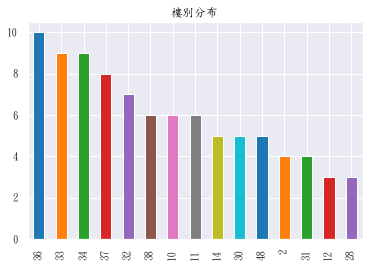

In [113]:
# 只顯示樓別不為 0 的資料
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
data_1 = data[data.樓別 != 0]
housetype = data_1['樓別'].value_counts()
housetype.head(15).plot(kind='bar',x=housetype,y='size', title='樓別分布', color=colors)
plt.show()

In [114]:
# 坪數最小房, 3.75坪
data.sort_values('總面積(坪)').iloc[0,:]

地址          忠孝東路三段211~240號
交易月年                 108/5
總價(萬)                  220
單價(萬/坪)               58.6
總面積(坪)                3.75
型態         住宅大樓(11層含以上有電梯)
樓別                      32
樓高                    5/14
Name: 85, dtype: object

In [115]:
# 坪數最大房, 410.6坪
data.sort_values('總面積(坪)',ascending=False).iloc[0,:]

地址         敦化南路二段91~120號
交易月年               108/5
總價(萬)              35661
單價(萬/坪)               92
總面積(坪)             410.6
型態                辦公商業大樓
樓別                    26
樓高                  8/27
Name: 50, dtype: object

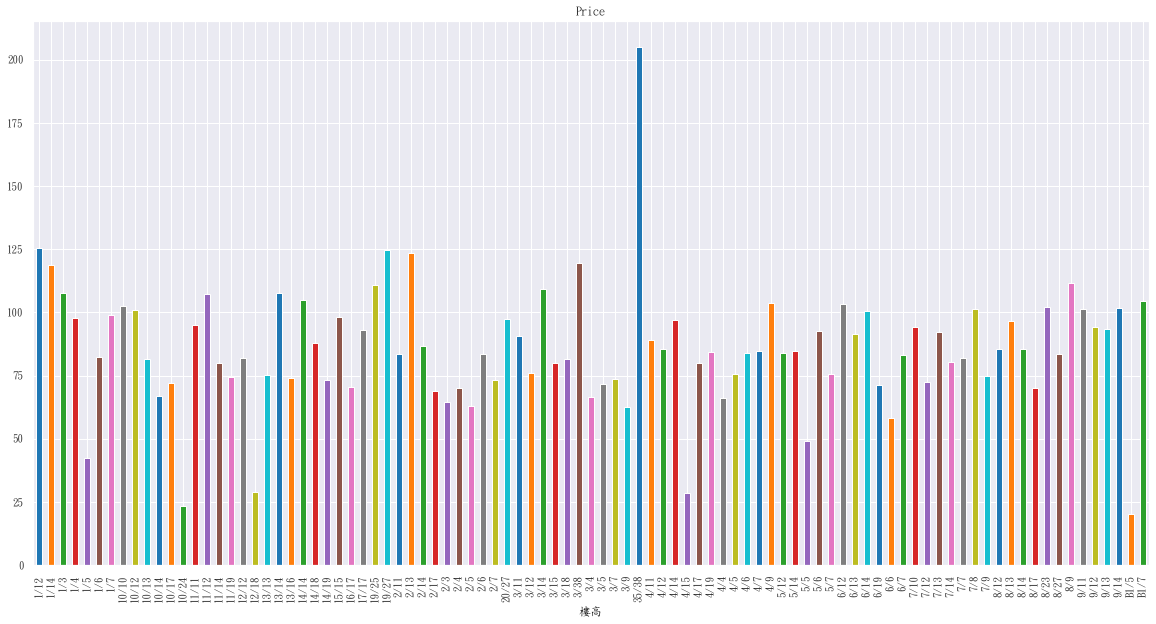

In [116]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig = plt.figure(figsize = (20, 10))
data_unitprice_perdistrict = data.groupby('樓高').mean()['單價(萬/坪)']
data_unitprice_perdistrict.plot(kind='bar',x='floor',y='unitPrice', title='Price', color=colors)
plt.show()

In [117]:
small_data = data
if '地址' in small_data.columns:
    del small_data['地址']
if '交易月年' in small_data.columns:
    del small_data['交易月年']
if '型態' in small_data.columns:
    del small_data['型態']
if '型態' in small_data.columns:
    del small_data['型態']
small_data.head(3)

,總價(萬),單價(萬/坪),總面積(坪),樓別,樓高
0,4000,98.3,40.70,2,15/15
1,1336,80.0,16.70,0,11/14
2,2360,70.2,33.64,34,8/17


In [118]:
prices = small_data['總價(萬)']
features = small_data.drop('樓高', axis = 1)
print ("dataset has {} data points with {} variables each.".format(*small_data.shape))

dataset has 197 data points with 5 variables each.


In [119]:
#目標：計算價值的最小值
minimum_price = np.min(prices)

#目標：計算價值的最大值
maximum_price = np.max(prices)

#目標：計算價值的均值
mean_price = np.mean(prices)

#目標：計算價值的中值
median_price = np.median(prices)

#目標：計算價值的標準差
std_price = np.std(prices)

print ("Statistics for 內政部 dataset:\n")
print ("Minimum price: NTD.{:,.2f}".format(minimum_price))
print ("Maximum price: NTD.{:,.2f}".format(maximum_price))
print ("Mean price: NTD.{:,.2f}".format(mean_price))
print ("Median price NTD.{:,.2f}".format(median_price))
print ("Standard deviation of prices: NTD.{:,.2f}".format(std_price))

Statistics for 內政部 dataset:

Minimum price: NTD.220.00
Maximum price: NTD.60,568.00
Mean price: NTD.3,207.93
Median price NTD.2,200.00
Standard deviation of prices: NTD.5,392.66


In [120]:
small_data.head()

,總價(萬),單價(萬/坪),總面積(坪),樓別,樓高
0,4000,98.3,40.70,2,15/15
1,1336,80.0,16.70,0,11/14
2,2360,70.2,33.64,34,8/17
3,1432,49.0,29.26,0,3/4
4,2250,80.4,27.99,12,10/12


In [121]:
# print (features)

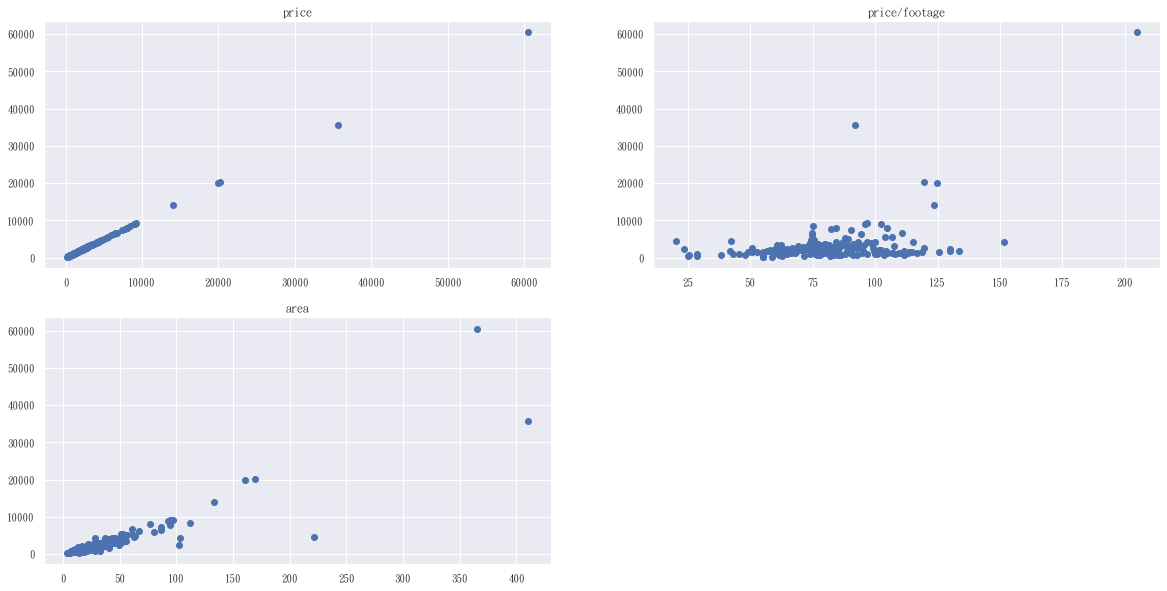

In [122]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title('price')
plt.scatter(features.get_values()[:, 0], prices.get_values())
plt.subplot(2, 2, 2)
plt.title('price/footage')
plt.scatter(features.get_values()[:, 1], prices.get_values())
plt.subplot(2, 2, 3)
plt.title('area')
plt.scatter(features.get_values()[:, 2], prices.get_values())

In [123]:
# Matrix form for correlation data
tp = small_data.corr()
tp

,總價(萬),單價(萬/坪),總面積(坪),樓別
總價(萬),1.000000,0.422070,0.897901,-0.102391
單價(萬/坪),0.422070,1.000000,0.164367,-0.266004
總面積(坪),0.897901,0.164367,1.000000,-0.048982
樓別,-0.102391,-0.266004,-0.048982,1.000000


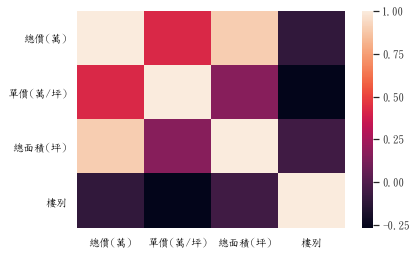

In [124]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())
%matplotlib inline

sns.heatmap(tp)

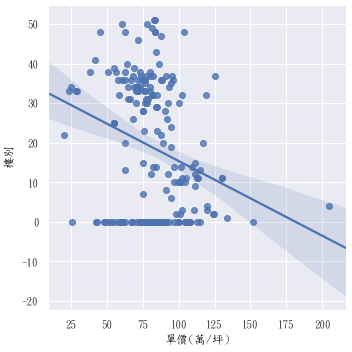

In [125]:
sns.lmplot(x='單價(萬/坪)', y='樓別', data=small_data, palette='coolwarm')

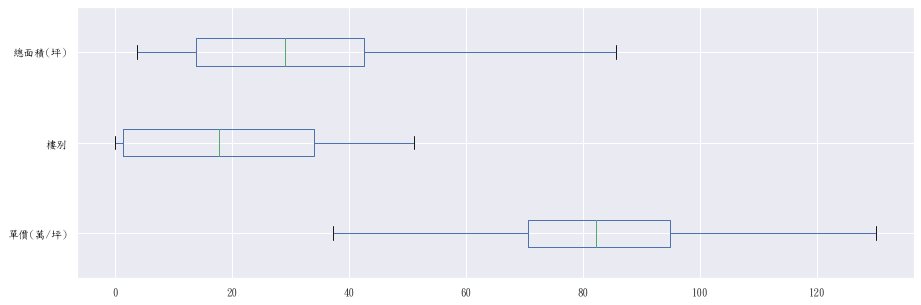

In [126]:
groupbyHousePriceMean = small_data.groupby('總價(萬)').mean()
plot = groupbyHousePriceMean[['單價(萬/坪)','樓別', '總面積(坪)']].plot.box(figsize=(15,5), vert=False, showfliers=False)

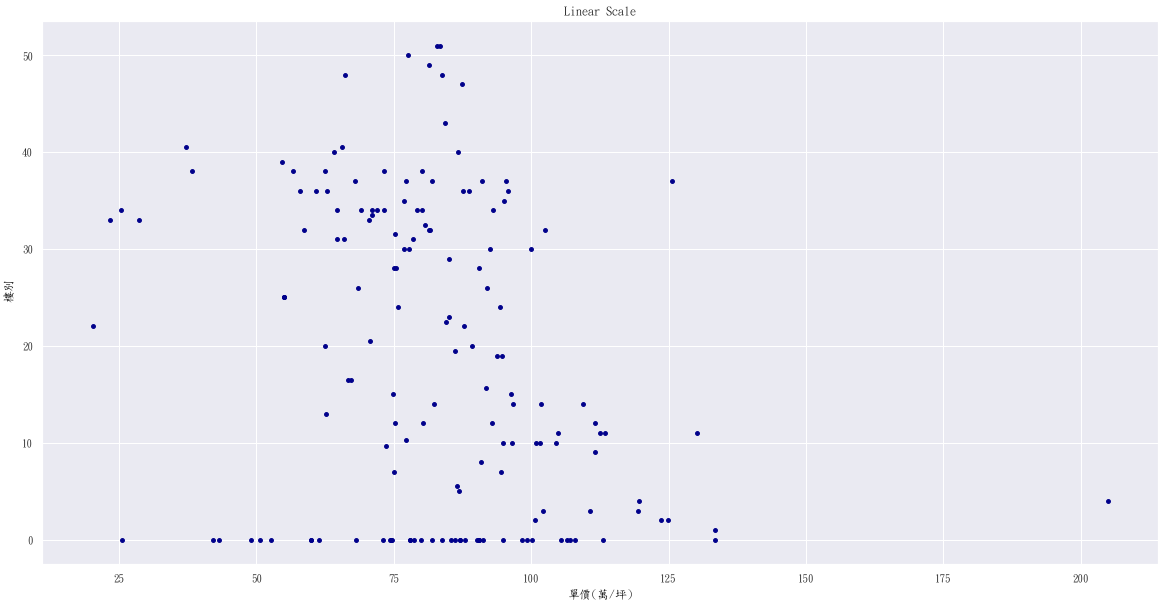

In [127]:
# 不見得樓層越高的物件，坪數單價會越高，沒有正相關
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyHousePriceMean.plot.scatter(x='單價(萬/坪)',y='樓別',c='DarkBlue',ax=ax[1], s=15)
plt.show()

In [128]:
features[:3]

,總價(萬),單價(萬/坪),總面積(坪),樓別
0,4000,98.3,40.70,2
1,1336,80.0,16.70,0
2,2360,70.2,33.64,34


In [129]:
features = small_data
if '總價(萬)' in features.columns:
    del features['總價(萬)']
if '單價(萬/坪)' in features.columns:
    del features['單價(萬/坪)']
if '樓高' in features.columns:
    del features['樓高']
features.head(3)

,總面積(坪),樓別
0,40.70,2
1,16.70,0
2,33.64,34


In [130]:
prices[:3]

0    4000
1    1336
2    2360
Name: 總價(萬), dtype: int64

<a id="DecisionTreeRegressor"></a>
## DecisionTreeRegressor

### train/test split

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features.values, prices.values, test_size=0.2, random_state=0)

print ("Training and testing split was successful.")

Training and testing split was successful.


In [132]:
def performance_metric(y_true, y_predict):
    y_true, y_predict = np.array(y_true), np.array(y_predict)
    numerator = np.sum((y_true - y_predict) ** 2)
    denominator = np.sum((y_true - np.average(y_true)) ** 2)
    score = 1 - numerator / denominator
    return score

In [133]:
score = performance_metric([4000, 98.3, 40.70, 2], [4000, 98.3, 40.70, 2])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 1.000.


In [134]:
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    # 從訓練資料中建立交叉驗證資料集
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # 建立決策樹迴歸物件 regressor
    regressor = DecisionTreeRegressor(random_state = 66)

    # 為參數 maxdepth 建立字典，值為 1 至 10
    params = {"max_depth":np.arange(1,11)}
 
    # 將 performance_metric 轉換為一個scoring函數，使用 make 記分
    scoring_fnc = make_scorer(performance_metric)

    # 建立貪婪網路搜尋物件
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # 將 grid 物件與資料擬合以計算最佳模型
    grid = grid.fit(X, y)

    # 在 fit 資料之後回傳最佳模型
    return grid.best_estimator_

In [135]:
X_train[:3]

array([[47.44,  0.  ],
       [36.47, 37.  ],
       [33.37,  0.  ]])

In [136]:
Y_train[:3]

array([3250.8, 2804.4,  528.7])

In [137]:
# 取得最佳 model
reg = fit_model(X_train, y_train)

In [138]:
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 3 for the optimal model.


## 預測客戶在大安區房子的成交價(依據樓層與坪數)
當以訓練集資料做出模型後，現在可用於對新的資料進行預測。在決策樹迴歸函數中，模型已經學會對新輸入的資料，並返回對**目標變數**的預測值。你可以用這個預測來獲取資料未知目標變數的資訊，須留意，預測的資料必須是「不」包含在訓練資料之內的。

###  - 預測房屋成交價格
想像你是房屋仲介商，並再拿到大安區物件時，向客戶解釋你對這區域房屋預測的價格，以充分理解合理的成交價格落在哪個區間:

| 特徵 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 總面積(坪)	 | 32.2 | 11.1 | 61 |
| 樓別 | 4 | 15 | 16 |


In [139]:
client_data = [[32.2, 4],  # 客戶 1
               [11.1, 1],  # 客戶 2
               [61, 16]]   # 客戶 3
test_data = np.array(client_data)

# 預測成交價
for i, price in enumerate(reg.predict(test_data)):
    print ("Predicted 客戶 {} 的房子，成交價: NTD.{:,.2f} 萬元".format(i+1, price))

Predicted 客戶 1 的房子，成交價: NTD.2,831.88 萬元
Predicted 客戶 2 的房子，成交價: NTD.1,146.54 萬元
Predicted 客戶 3 的房子，成交價: NTD.4,613.00 萬元


### Save DecisionTreeRegressor model

In [140]:
import pickle
with open('model/DecisionTreeRegressor/model_house_bid_price.pkl', 'wb') as handle:
    pickle.dump(reg, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load DecisionTreeRegressor model

In [141]:
import pickle
with open('model/DecisionTreeRegressor/model_house_bid_price.pkl', 'rb') as handle:
    decision_tree_regressor_model = pickle.load(handle)

In [142]:
feet_dict  = {'物件1': 32.2, '物件2': 11.1}
floor_dict = {'物件1': 4,    '物件2': 1}
d_test = pd.DataFrame({'坪數': feet_dict,
                       '樓層': floor_dict})
d_test

,坪數,樓層
物件1,32.2,4
物件2,11.1,1


In [143]:
test_subject = d_test.values
test_subject

array([[32.2,  4. ],
       [11.1,  1. ]])

In [144]:
for i, price in enumerate(decision_tree_regressor_model.predict(test_subject)):
    print ("Predicted 物件 {} 的房子，成交價: NTD.{:,.2f} 萬元".format(i+1, price))

Predicted 物件 1 的房子，成交價: NTD.2,831.88 萬元
Predicted 物件 2 的房子，成交價: NTD.1,146.54 萬元


<a id="BTCPriceVisualization"></a>
## BTC Price visualization

In [145]:
from datetime import datetime as dt
from delorean import Delorean
from datetime import timedelta as timedelta

def date_to_delorean(year, month, day):
    return Delorean(datetime=dt.now(), timezone='Asia/Taipei')

def date_to_epoch(year, month, day):
    return int(date_to_delorean(year, month, day).epoch)

def now_delorean():
    return Delorean(timezone='Asia/Taipei')

def shift_epoch(delorean, direction, unit, count):
    return int(delorean._shift_date(direction, unit, count).epoch)

def generate_epochs(delorean, direction, unit, count):
    for shift in range(count):
        yield int(delorean._shift_date(direction, unit, shift).epoch)

def get_end_start_epochs(year, month, day, direction, unit, count):
    if year or month or day:
        if not year:
            year = 2019
        if not month:
            month = 1
        if not day:
            day = 1
        initial_delorean = date_to_delorean(year, month, day)
    else:
        count += 1
        initial_delorean = now_delorean()
    
    initial_epoch = int(initial_delorean.epoch)
    shifted_epoch = shift_epoch(initial_delorean, direction, unit, count)
    return { 'initial': initial_epoch, 'shifted': shifted_epoch }

In [146]:
today = dt.now()
DIRECTION = 'last'
unit='month'
count=12
epochs = get_end_start_epochs(today.year, today.month, today.day, DIRECTION, unit, count)
print(epochs)

{'initial': 1616128358, 'shifted': 1584592358}


### crawl poloniex USDT_BTC

In [147]:
import requests
import json
import pandas as pd
import datetime

rs = requests.session()
start_time = epochs['shifted']
end_time = epochs['initial']
api = 'https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start={}&end={}&period=86400'.format(start_time, end_time)
html_data = rs.get(api)
jObj = json.loads(html_data.text)

In [148]:
data = pd.DataFrame(jObj)
data.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1584592358,6166.854359,6166.854359,6166.854359,6166.854359,0.000000e+00,0.000000,6166.854359
1,1584662400,6905.478037,5668.780794,6166.852805,6208.745217,3.000812e+07,4714.265079,6365.385943
2,1584748800,6444.447180,5870.278219,6208.611958,6186.694282,1.662054e+07,2698.402022,6159.401784
3,1584835200,6404.021411,5745.909091,6186.704990,5826.409160,1.729848e+07,2841.356524,6088.105117
4,1584921600,6600.000003,5689.129294,5824.713982,6470.603015,2.051669e+07,3321.176381,6177.535858


In [149]:
def timestampToDateTime(timestamp):
    dt = (datetime.datetime.fromtimestamp(timestamp) - datetime.timedelta(hours=8)).strftime('%Y-%m-%d %H:%M:%S')
    return dt

data["datetime"] = data["date"].apply(lambda x: timestampToDateTime(x))
data.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,datetime
0,1584592358,6166.854359,6166.854359,6166.854359,6166.854359,0.000000e+00,0.000000,6166.854359,2020-03-19 04:32:38
1,1584662400,6905.478037,5668.780794,6166.852805,6208.745217,3.000812e+07,4714.265079,6365.385943,2020-03-20 00:00:00
2,1584748800,6444.447180,5870.278219,6208.611958,6186.694282,1.662054e+07,2698.402022,6159.401784,2020-03-21 00:00:00
3,1584835200,6404.021411,5745.909091,6186.704990,5826.409160,1.729848e+07,2841.356524,6088.105117,2020-03-22 00:00:00
4,1584921600,6600.000003,5689.129294,5824.713982,6470.603015,2.051669e+07,3321.176381,6177.535858,2020-03-23 00:00:00


In [150]:
# 刪除交易量為 0 的資料
data = data[data.quoteVolume != 0]
data.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,datetime
1,1584662400,6905.478037,5668.780794,6166.852805,6208.745217,3.000812e+07,4714.265079,6365.385943,2020-03-20 00:00:00
2,1584748800,6444.447180,5870.278219,6208.611958,6186.694282,1.662054e+07,2698.402022,6159.401784,2020-03-21 00:00:00
3,1584835200,6404.021411,5745.909091,6186.704990,5826.409160,1.729848e+07,2841.356524,6088.105117,2020-03-22 00:00:00
4,1584921600,6600.000003,5689.129294,5824.713982,6470.603015,2.051669e+07,3321.176381,6177.535858,2020-03-23 00:00:00
5,1585008000,6828.290000,6376.269760,6464.274119,6747.408540,2.149425e+07,3243.156189,6627.571902,2020-03-24 00:00:00


In [151]:
# 加上只有日期
data["month_day"] = data["date"].apply(lambda x: pd.datetime.fromtimestamp(x).date())

# 刪除 timestamp 欄位
# if 'date' in data.columns:
#     del data['date']

data.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,datetime,month_day
1,1584662400,6905.478037,5668.780794,6166.852805,6208.745217,3.000812e+07,4714.265079,6365.385943,2020-03-20 00:00:00,2020-03-20
2,1584748800,6444.447180,5870.278219,6208.611958,6186.694282,1.662054e+07,2698.402022,6159.401784,2020-03-21 00:00:00,2020-03-21
3,1584835200,6404.021411,5745.909091,6186.704990,5826.409160,1.729848e+07,2841.356524,6088.105117,2020-03-22 00:00:00,2020-03-22
4,1584921600,6600.000003,5689.129294,5824.713982,6470.603015,2.051669e+07,3321.176381,6177.535858,2020-03-23 00:00:00,2020-03-23
5,1585008000,6828.290000,6376.269760,6464.274119,6747.408540,2.149425e+07,3243.156189,6627.571902,2020-03-24 00:00:00,2020-03-24


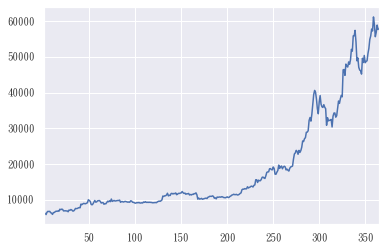

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

# 有點看不懂的圖
data.close.plot()

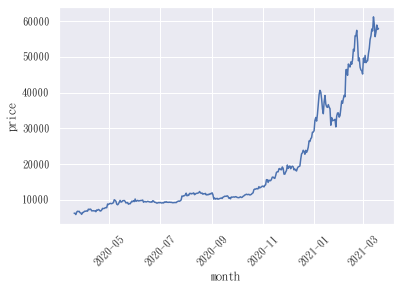

In [153]:
# 時間序列
x_list = data['month_day']
y_list = data['close']
plt.xticks(rotation=45)
plt.xlabel('month')
plt.ylabel('price')
plt.plot(x_list, y_list)

## K 線圖

在 `matplotlib.finance` 中有個叫 `candlestick2_ochl` 的指令。

candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='r', colordown='g')


在 matplotlib 2.2 之後就要正式說再見的 `matplotlib.finace`, 之後會獨立叫 `mpl_finance`。
    
    pip install mpl_finance
    或
    pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [154]:
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

In [155]:
data_ohlc = data[["month_day", "open", "high", "low", "close"]]
data_ohlc.head()

,month_day,open,high,low,close
1,2020-03-20,6166.852805,6905.478037,5668.780794,6208.745217
2,2020-03-21,6208.611958,6444.447180,5870.278219,6186.694282
3,2020-03-22,6186.704990,6404.021411,5745.909091,5826.409160
4,2020-03-23,5824.713982,6600.000003,5689.129294,6470.603015
5,2020-03-24,6464.274119,6828.290000,6376.269760,6747.408540


([<matplotlib.lines.Line2D at 0x14180a3d080>,
  <matplotlib.patches.Rectangle at 0x14180e8f668>])

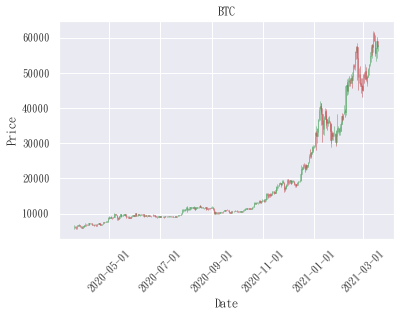

In [156]:
data_ohlc.head()
data_ohlc['Date2'] = data_ohlc['month_day'].apply(lambda d: mdates.date2num(d))
tuples = [tuple(x) for x in data_ohlc[['Date2','open','high','low','close']].values]
fig, ax = plt.subplots()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("BTC")
candlestick_ohlc(ax, tuples, width=.6, colorup='g', alpha =.4)

In [157]:
df_ohlcm = data_ohlc[-20:]

In [158]:
dates = df_ohlcm["Date2"].values
close = df_ohlcm["close"].values

data_ohlc["MA240"] = data_ohlc.close.rolling(240).mean()
data_ohlc["MA20"] = data_ohlc.close.rolling(20).mean()
data_ohlc["MA5"] = data_ohlc.close.rolling(5).mean()

In [159]:
ma240 = data_ohlc.MA240[-20:]
ma20 = data_ohlc.MA20[-20:]
ma5 = data_ohlc.MA5[-20:]

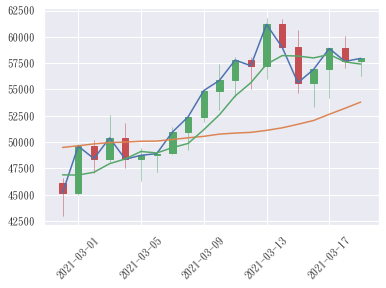

In [160]:
ax = plt.gca()

ax.xaxis_date()
tuples = [tuple(x) for x in df_ohlcm[['Date2','open','high','low','close']].values]
candlestick_ohlc(ax, tuples, width=0.4, colorup='g', colordown='r');
plt.xticks(rotation=45)
plt.plot(dates, close)
plt.plot(dates, ma20)
plt.plot(dates, ma5)

<a id="BTCPricePrediction"></a>

## Predicting Bitcoin Prices with Time Series Analysis

In [161]:
import requests
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline

rs = requests.session()

from datetime import datetime as dt
from delorean import Delorean
from datetime import timedelta as timedelta

def date_to_delorean(year, month, day):
    return Delorean(datetime=dt.now(), timezone='Asia/Taipei')

def date_to_epoch(year, month, day):
    return int(date_to_delorean(year, month, day).epoch)

def now_delorean():
    return Delorean(timezone='Asia/Taipei')

def shift_epoch(delorean, direction, unit, count):
    return int(delorean._shift_date(direction, unit, count).epoch)

def generate_epochs(delorean, direction, unit, count):
    for shift in range(count):
        yield int(delorean._shift_date(direction, unit, shift).epoch)

def get_end_start_epochs(year, month, day, direction, unit, count):
    if year or month or day:
        if not year:
            year = 2019
        if not month:
            month = 1
        if not day:
            day = 1
        initial_delorean = date_to_delorean(year, month, day)
    else:
        count += 1
        initial_delorean = now_delorean()
    
    initial_epoch = int(initial_delorean.epoch)
    shifted_epoch = shift_epoch(initial_delorean, direction, unit, count)
    return { 'initial': initial_epoch, 'shifted': shifted_epoch }

def timestampToDateTime(timestamp):
    dt = (datetime.datetime.fromtimestamp(timestamp) - datetime.timedelta(hours=8)).strftime('%Y-%m-%d %H:%M:%S')
    return dt

def get_digital_currency_data(epochs, pair, period_second):
    start_time = epochs['shifted']
    end_time = epochs['initial']
    api = 'https://poloniex.com/public?command=returnChartData&currencyPair={}&start={}&end={}&period={}'.format(pair, start_time, end_time,period_second)
    html_data = rs.get(api)
    jObj = json.loads(html_data.text)
    data = pd.DataFrame(jObj)
    data["datetime"] = data["date"].apply(lambda x: timestampToDateTime(x))
    # 刪除交易量為 0 的資料
    data = data[data.quoteVolume != 0]
    data["month_day"] = data["date"].apply(lambda x: pd.datetime.fromtimestamp(x).date())
    return data

In [162]:
today = dt.now()
DIRECTION = 'last'
unit='month'
count=12
epochs = get_end_start_epochs(today.year, today.month, today.day, DIRECTION, unit, count)
# print(epochs)
market_pair = "USDT_BTC"
period_second = "86400"
bitcoin = get_digital_currency_data(epochs, market_pair, period_second)
market_pair = "USDT_ETH"
period_second = "86400"
ethereum = get_digital_currency_data(epochs, market_pair, period_second)

In [163]:
bitcoin.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,datetime,month_day
1,1584662400,6905.478037,5668.780794,6166.852805,6208.745217,3.000812e+07,4714.265079,6365.385943,2020-03-20 00:00:00,2020-03-20
2,1584748800,6444.447180,5870.278219,6208.611958,6186.694282,1.662054e+07,2698.402022,6159.401784,2020-03-21 00:00:00,2020-03-21
3,1584835200,6404.021411,5745.909091,6186.704990,5826.409160,1.729848e+07,2841.356524,6088.105117,2020-03-22 00:00:00,2020-03-22
4,1584921600,6600.000003,5689.129294,5824.713982,6470.603015,2.051669e+07,3321.176381,6177.535858,2020-03-23 00:00:00,2020-03-23
5,1585008000,6828.290000,6376.269760,6464.274119,6747.408540,2.149425e+07,3243.156189,6627.571902,2020-03-24 00:00:00,2020-03-24


<function matplotlib.pyplot.show(*args, **kw)>

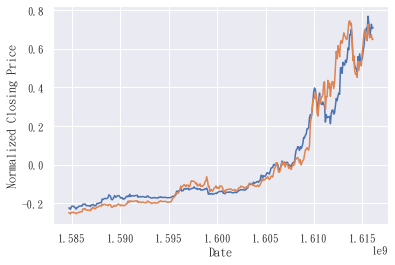

In [164]:
#Normalized Closing Price, comparer by BTC & ETH
bitcoin_close=(bitcoin['close']-bitcoin['close'].mean())/(bitcoin['close'].max()-bitcoin['close'].min())
ethereum_close=(ethereum['close']-ethereum['close'].mean())/(ethereum['close'].max()-ethereum['close'].min())

bitcoin[['close','quoteVolume','volume']] = (bitcoin[['close','quoteVolume','volume']]-bitcoin[['close','quoteVolume','volume']].mean())/(bitcoin[['close','quoteVolume','volume']].max()-bitcoin[['close','quoteVolume','volume']].min())
ethereum[['close','quoteVolume','volume']] = (ethereum[['close','quoteVolume','volume']]-ethereum[['close','quoteVolume','volume']].mean())/(ethereum[['close','quoteVolume','volume']].max()-ethereum[['close','quoteVolume','volume']].min())

plt.plot(bitcoin['date'], bitcoin_close, ethereum['date'], ethereum_close)
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price')
plt.show

In [165]:
output_data = bitcoin[['close']]
output_data.loc[:,'next_close']=output_data['close'].shift(-1)
output_data=output_data.dropna()
output_data.head()

,close,next_close
1,-0.224091,-0.224489
2,-0.224489,-0.230998
3,-0.230998,-0.219360
4,-0.219360,-0.214360
5,-0.214360,-0.215567


In [166]:
df_copy = data[:-1]
df_copy.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,datetime,month_day
1,1584662400,6905.478037,5668.780794,6166.852805,6208.745217,3.000812e+07,4714.265079,6365.385943,2020-03-20 00:00:00,2020-03-20
2,1584748800,6444.447180,5870.278219,6208.611958,6186.694282,1.662054e+07,2698.402022,6159.401784,2020-03-21 00:00:00,2020-03-21
3,1584835200,6404.021411,5745.909091,6186.704990,5826.409160,1.729848e+07,2841.356524,6088.105117,2020-03-22 00:00:00,2020-03-22
4,1584921600,6600.000003,5689.129294,5824.713982,6470.603015,2.051669e+07,3321.176381,6177.535858,2020-03-23 00:00:00,2020-03-23
5,1585008000,6828.290000,6376.269760,6464.274119,6747.408540,2.149425e+07,3243.156189,6627.571902,2020-03-24 00:00:00,2020-03-24


In [167]:
#No needed for prediction
if 'date' in df_copy.columns:
    del df_copy['date']
if 'month_day' in df_copy.columns:
    del df_copy['month_day']
if 'datetime' in df_copy.columns:
    del df_copy['datetime']
if 'weightedAverage' in df_copy.columns:
    del df_copy['weightedAverage']
df_copy.head()

,high,low,open,close,volume,quoteVolume
1,6905.478037,5668.780794,6166.852805,6208.745217,3.000812e+07,4714.265079
2,6444.447180,5870.278219,6208.611958,6186.694282,1.662054e+07,2698.402022
3,6404.021411,5745.909091,6186.704990,5826.409160,1.729848e+07,2841.356524
4,6600.000003,5689.129294,5824.713982,6470.603015,2.051669e+07,3321.176381
5,6828.290000,6376.269760,6464.274119,6747.408540,2.149425e+07,3243.156189


In [168]:
# output_data['next_close'].size
# data[:-1] #drop bottom 1
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_copy.values, output_data['next_close'], test_size=0.15)

In [169]:
import numpy as np # linear algebra
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

print(x_train.shape,y_train.shape)
cnn  = MLPRegressor(solver = 'lbfgs')
cnn.fit(x_train, y_train)

cnn.score(x_test, y_test)

(309, 6) (309,)


-65340.20170515993

## conclusion

r^2 score close to one so not very different to predicting the mean of the target every time, Ill try adding more lag to the data

### Predicting if the price will go up or down

In [170]:
output_data.loc[:,'next_close_diff'] = output_data.loc[:,'next_close'].diff()
output_data.iloc[0,2] = output_data.iloc[0,1] - output_data.iloc[0,0]

output_data.loc[:,'Price_Movement'] = np.where(output_data.loc[:,'next_close_diff']<0,'down','up')

output_data.head()

,close,next_close,next_close_diff,Price_Movement
1,-0.224091,-0.224489,-0.000398,down
2,-0.224489,-0.230998,-0.006509,down
3,-0.230998,-0.219360,0.011638,up
4,-0.219360,-0.214360,0.005001,up
5,-0.214360,-0.215567,-0.001208,down


In [171]:
print(data.shape,output_data.shape)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_copy.values, output_data['Price_Movement'], test_size=0.15)

CNNclass = MLPClassifier(solver = 'lbfgs')
CNNclass_model = CNNclass.fit(x_train2, y_train2)

CNNclass.score(x_test2, y_test2)

(365, 10) (364, 4)


0.45454545454545453

In [172]:
df_copy[:2]

,high,low,open,close,volume,quoteVolume
1,6905.478037,5668.780794,6166.852805,6208.745217,3.000812e+07,4714.265079
2,6444.447180,5870.278219,6208.611958,6186.694282,1.662054e+07,2698.402022


In [173]:
# close, high, low, open, quoteVolume, volume
test_ = [[6354.767602, 6894.597094, 6255.608559, 6479.132290, 2172.958589, 1.429791e+07]]
test_ = [[6630.20000,6655.999998,6500.000000,6655.999998,458.869558,3.018852e+06]]
CNNclass_model.predict(test_)

array(['down'], dtype='<U4')

In [174]:
df_copy[:1]

,high,low,open,close,volume,quoteVolume
1,6905.478037,5668.780794,6166.852805,6208.745217,3.000812e+07,4714.265079


In [175]:
# 昨天的收盤價，預測今日收高還是走低
test_subject = df_copy[:1].values
CNNclass_model.predict(test_subject)

array(['up'], dtype='<U4')

In [176]:
market_pair = "USDT_BTC"
period_second = "86400"
bitcoin = get_digital_currency_data(epochs, market_pair, period_second)
bitcoin = bitcoin[['close','high','low','open','quoteVolume','volume']]
bitcoin.head()

,close,high,low,open,quoteVolume,volume
1,6208.745217,6905.478037,5668.780794,6166.852805,4714.265079,3.000812e+07
2,6186.694282,6444.447180,5870.278219,6208.611958,2698.402022,1.662054e+07
3,5826.409160,6404.021411,5745.909091,6186.704990,2841.356524,1.729848e+07
4,6470.603015,6600.000003,5689.129294,5824.713982,3321.176381,2.051669e+07
5,6747.408540,6828.290000,6376.269760,6464.274119,3243.156189,2.149425e+07


In [177]:
test_subject = bitcoin[:1].values
CNNclass_model.predict(test_subject)

array(['down'], dtype='<U4')

### Linear Regression of Bitcoin price based on OHLC

In [178]:
today = dt.now()
DIRECTION = 'last'
unit='month'
count=12
epochs = get_end_start_epochs(today.year, today.month, today.day, DIRECTION, unit, count)
market_pair = "USDT_BTC"
period_second = "86400"
bitcoin = get_digital_currency_data(epochs, market_pair, period_second)
bitcoin = bitcoin[['close','high','low','open','quoteVolume','volume','month_day']]
data_ohlc = bitcoin[['close','high','low','open']]
data_ohlc.tail()

,close,high,low,open
361,55638.210845,60629.275465,54628.589810,59000.846465
362,56900.995990,56912.995887,53297.884124,55600.000000
363,58893.024536,58973.000000,54162.361704,56898.213439
364,57662.260133,60081.000000,57057.000000,58913.317700
365,57951.342170,57975.503947,56305.000000,57670.668650


In [179]:
bitcoin.tail()

,close,high,low,open,quoteVolume,volume,month_day
361,55638.210845,60629.275465,54628.589810,59000.846465,1702.802210,9.742025e+07,2021-03-15
362,56900.995990,56912.995887,53297.884124,55600.000000,1378.300611,7.613744e+07,2021-03-16
363,58893.024536,58973.000000,54162.361704,56898.213439,1023.586111,5.756128e+07,2021-03-17
364,57662.260133,60081.000000,57057.000000,58913.317700,1000.033753,5.849957e+07,2021-03-18
365,57951.342170,57975.503947,56305.000000,57670.668650,192.411116,1.101179e+07,2021-03-19


In [180]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
np.random.seed(42)

In [181]:
features = data_ohlc[['open','high','low','close']].values
targets = data_ohlc['close'].shift(periods=-1).fillna(0).values

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, shuffle=False, random_state=42)

In [182]:
lm = LinearRegression()
# actual training is done in one line of code, sci-kit library takes care of everything
lm.fit(x_train, y_train)
lm.coef_

array([0.01732089, 0.00806867, 0.05429354, 0.93153646])

Text(0, 0.5, 'Predicted values with linear model')

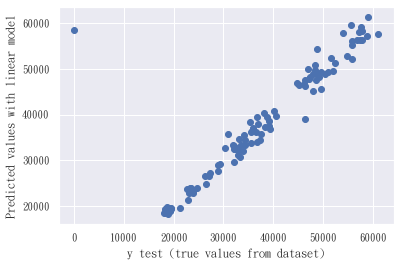

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline

predictions = lm.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('y test (true values from dataset)')
plt.ylabel('Predicted values with linear model')

### Model evaluation

In [184]:
from sklearn import metrics
print('MAE ', metrics.mean_absolute_error(y_test, predictions))
print('MSE ', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE  1846.9759206245806
MSE  34368710.42083951
RMSE 5862.483298128832


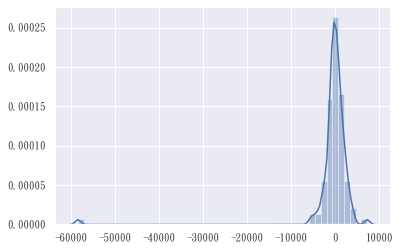

In [185]:
sns.distplot((y_test-predictions), bins=50)

In [186]:
cdf = pd.DataFrame(lm.coef_, data_ohlc.columns, columns=['Coeff'])
cdf

,Coeff
close,0.017321
high,0.008069
low,0.054294
open,0.931536


In [187]:
# 對答案：[[open, high, low, close]]
lm.predict([[58893,60116,54253,57858]])

array([58296.38464371])

### predict on coinmarketcap

In [188]:
# Helper functions
def to_date(datestring):
    datestring = datestring.split('T')[0]
    date = dateutil.parser.parse(datestring)
    return date

def list_to_average(list):
    try:
        avg = list[0]/list[1]
    except:
        avg = 0
    return avg

def to_log(num):
    return np.log(num)

In [189]:
import datetime
import requests
import pandas as pd
import dateutil.parser
from bs4 import BeautifulSoup

# Coinmarketcap scraping: Bitcoin by time period.  When updating, be sure to download for period of yesterday
today = datetime.date.today()
today = today.strftime("%Y%m%d")
today_timestamp = int(datetime.datetime.strptime(today, "%Y%m%d").timestamp())
yesterday = datetime.date.today() - datetime.timedelta(days=1)
yesterday = yesterday.strftime("%Y%m%d")
yesterday_timestamp = int(datetime.datetime.strptime(yesterday, "%Y%m%d").timestamp())
url = 'https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start={}&time_end={}'.format(yesterday_timestamp, today_timestamp)
# print(url)
response = requests.get(url)
page = response.text
jObj = json.loads(page)
btc_list = []
for btc in jObj['data']['quotes']:
    btc_list.append({"Date":btc["quote"]['USD']["timestamp"].replace('.999Z',''), "Open*":btc["quote"]['USD']["open"], "High":btc["quote"]['USD']["high"], "Low":btc["quote"]['USD']["low"], "Close**":btc["quote"]['USD']["close"], "Volume":btc["quote"]['USD']["volume"], "Market Cap":btc["quote"]['USD']["market_cap"]})
df_ = pd.DataFrame(btc_list)
df_['Date'] = df_['Date'].apply(to_date)
df_ = df_.set_index('Date')
df_.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2021-03-18,58893.078058,60116.249644,54253.580005,57858.920705,5.574604e+10,1.079511e+12


In [190]:
# 今日的收盤價預估：[[open, high, low, close]]
lm.predict([[df_.iloc[0]['Open*'],df_.iloc[0]['High'], df_.iloc[0]['Low'], df_.iloc[0]['Close**']]])

array([58297.27717108])

In [191]:
import requests
import dateutil.parser
from bs4 import BeautifulSoup

start_timestamp = '1438876800'
today = datetime.date.today()
today = today.strftime("%Y%m%d")
today_timestamp = int(datetime.datetime.strptime(today, "%Y%m%d").timestamp())

# Coinmarketcap scraping: Bitcoin by time period.  When updating, be sure to download for period 2015-08-07 to present
url = 'https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start={}&time_end={}'.format(start_timestamp, today_timestamp)
# print(url)
response = requests.get(url)
page = response.text
jObj = json.loads(page)
btc_list = []
for btc in jObj['data']['quotes']:
    btc_list.append({"Date":btc["quote"]['USD']["timestamp"].replace('.999Z',''), "Open*":btc["quote"]['USD']["open"], "High":btc["quote"]['USD']["high"], "Low":btc["quote"]['USD']["low"], "Close**":btc["quote"]['USD']["close"], "Volume":btc["quote"]['USD']["volume"], "Market Cap":btc["quote"]['USD']["market_cap"]})
df_btc = pd.DataFrame(btc_list)
df_btc['Date'] = df_btc['Date'].apply(to_date)
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
df_btc['Date2'] = df_btc['Date']
df_btc = df_btc.set_index('Date2')
df_btc.to_pickle('data/Bitcoin/coinmarketcap_btc_ohlc.pkl')
df_btc.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
Date2,,,,,,,
2015-08-07,2015-08-07,278.740997,280.391998,276.365997,279.584991,42484800.0,4.045993e+09
2015-08-08,2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,3.778049e+09
2015-08-09,2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,3.838130e+09
2015-08-10,2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,3.830352e+09
2015-08-11,2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,3.917143e+09


In [192]:
# Coinmarketcap scraping: Ethereum by time period.  When updating, be sure to download for period 2015-08-07 to present
url = 'https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1027&convert=USD&time_start={}&time_end={}'.format(start_timestamp, today_timestamp)
# print(url)
response = requests.get(url)
page = response.text
jObj = json.loads(page)
eth_list = []
for eth in jObj['data']['quotes']:
    eth_list.append({"Date":eth["quote"]['USD']["timestamp"].replace('.999Z',''), "Open*":eth["quote"]['USD']["open"], "High":eth["quote"]['USD']["high"], "Low":eth["quote"]['USD']["low"], "Close**":eth["quote"]['USD']["close"], "Volume":eth["quote"]['USD']["volume"], "Market Cap":eth["quote"]['USD']["market_cap"]})
df_eth = pd.DataFrame(eth_list)
df_eth['Date'] = df_eth['Date'].apply(to_date)
df_eth['Date'] = pd.to_datetime(df_eth['Date'])
df_eth['Date2'] = df_eth['Date']
df_eth = df_eth.set_index('Date2')
df_eth.to_pickle('data/Bitcoin/coinmarketcap_eth_ohlc.pkl')
df_eth.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
Date2,,,,,,,
2015-08-08,2015-08-08,2.793760,2.798810,0.714725,0.753325,674188.0,4.548689e+07
2015-08-09,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0,4.239957e+07
2015-08-10,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0,4.281836e+07
2015-08-11,2015-08-11,0.708087,1.131410,0.663235,1.067860,1463100.0,6.456929e+07
2015-08-12,2015-08-12,1.058750,1.289940,0.883608,1.217440,2150620.0,7.364501e+07


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_ohlc = df_btc[['Open*','High','Low','Close**']]
features = data_ohlc[['Open*','High','Low','Close**']].values
targets = data_ohlc['Close**'].shift(periods=-1).fillna(0).values
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, shuffle=False, random_state=42)

In [194]:
lm = LinearRegression()
# actual training is done in one line of code, sci-kit library takes care of everything
lm.fit(x_train, y_train)
lm.coef_

array([ 0.08047291, -0.17253097, -0.12265285,  1.21349194])

Text(0, 0.5, 'Predicted values with linear model')

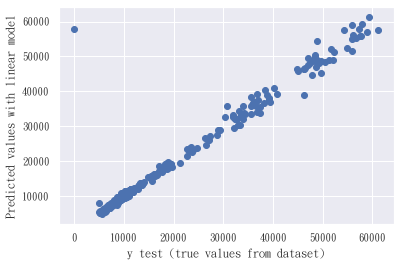

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline

predictions = lm.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('y test (true values from dataset)')
plt.ylabel('Predicted values with linear model')

In [196]:
# Model evaluation
import numpy as np
from sklearn import metrics

print('MAE ', metrics.mean_absolute_error(y_test, predictions))
print('MSE ', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE  513.0626275877253
MSE  6160109.941679896
RMSE 2481.9568774819386


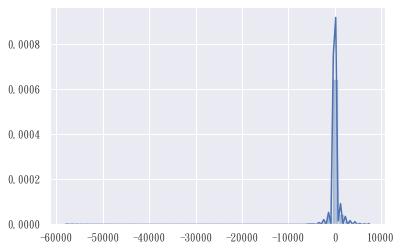

In [197]:
sns.distplot((y_test-predictions), bins=50)

In [198]:
cdf = pd.DataFrame(lm.coef_, data_ohlc.columns, columns=['Coeff'])
cdf

,Coeff
Open*,0.080473
High,-0.172531
Low,-0.122653
Close**,1.213492


In [199]:
lm.predict([[df_.iloc[0]['Open*'],df_.iloc[0]['High'], df_.iloc[0]['Low'], df_.iloc[0]['Close**']]])

array([57940.61089068])

### Social interestes on Google Trends

In [200]:
# Google Trends
# Download weekly from google trends from time period 2015-08-01 to present day
# https://trends.google.com/trends/explore?date=2015-08-01%202021-03-19&q=bitcoin
df_goog = pd.read_csv('data/Bitcoin/BTCGoogleTrends.csv') # Google Trends "bitcoin" interest over time
df_goog = df_goog.iloc[2:]
df_goog = df_goog.rename(columns={'Category: All categories': 'Interest'})
df_goog['Date2'] = df_goog.index
df_goog['Date2'] = pd.to_datetime(df_goog['Date2'])
df_goog = df_goog.set_index('Date2')
df_goog = df_goog.sort_index()
df_goog.tail()

,Interest
Date2,
2021-02-14,61
2021-02-21,63
2021-02-28,43
2021-03-07,43
2021-03-14,46


### Not all date has google trends data

<img src="images/google_trend_btc_2021.png">

In [201]:
import datetime

start = datetime.datetime.strptime("2015-08-16", "%Y-%m-%d")
end = datetime.datetime.strptime("2021-03-14", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
for date in date_generated[:10]:
    collectioin_name = date.strftime("%Y-%m-%d")
    #print(collectioin_name)
    y_ = collectioin_name[:4]
    m_ = collectioin_name[5:7]
    d_ = collectioin_name[8:10]
    cd_min = "{}/{}/{}".format(m_,d_,y_)
    cd_max = "{}/{}/{}".format(m_,d_,y_)
    print(cd_min)

08/16/2015
08/17/2015
08/18/2015
08/19/2015
08/20/2015
08/21/2015
08/22/2015
08/23/2015
08/24/2015
08/25/2015


In [202]:
# len(df_[df_.Volume == '-'])
df_btc = df_btc.rename(columns={'Open*':'BTCOpen', 'High':'BTCHigh', 'Low':'BTCLow', 'Close**':'BTCPrice','Volume':'BTCVol','Market Cap':'BTC Market Cap'})
df_btc.keys()
df_btc['logBTCPrice'] = df_btc['BTCPrice'].apply(to_log)
df_btc['logBTCMarketCap'] = df_btc['BTC Market Cap'].apply(to_log)
df_btc.to_pickle('data/Bitcoin/coinmarketcap_btc_all.pkl')
df_btc.head()

,Date,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap
Date2,,,,,,,,,
2015-08-07,2015-08-07,278.740997,280.391998,276.365997,279.584991,42484800.0,4.045993e+09,5.633306,22.120993
2015-08-08,2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,3.778049e+09,5.564509,22.052474
2015-08-09,2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,3.838130e+09,5.580043,22.068251
2015-08-10,2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,3.830352e+09,5.577728,22.066223
2015-08-11,2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,3.917143e+09,5.599851,22.088628


In [203]:
df_eth = df_eth.rename(columns={'Open*':'ETHOpen', 'High':'ETHHigh', 'Low':'ETHLow', 'Close**':'ETHPrice','Volume':'ETHVol','Market Cap':'ETH Market Cap'})
df_eth['logETHPrice'] = df_eth['ETHPrice'].apply(to_log)
df_eth['logETHMarketCap'] = df_eth['ETH Market Cap'].apply(to_log)
df_eth.to_pickle('data/Bitcoin/coinmarketcap_eth_all.pkl')
df_eth.head()

,Date,ETHOpen,ETHHigh,ETHLow,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap
Date2,,,,,,,,,
2015-08-08,2015-08-08,2.793760,2.798810,0.714725,0.753325,674188.0,4.548689e+07,-0.283259,17.632935
2015-08-09,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0,4.239957e+07,-0.353969,17.562649
2015-08-10,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0,4.281836e+07,-0.344679,17.572478
2015-08-11,2015-08-11,0.708087,1.131410,0.663235,1.067860,1463100.0,6.456929e+07,0.065657,17.983249
2015-08-12,2015-08-12,1.058750,1.289940,0.883608,1.217440,2150620.0,7.364501e+07,0.196750,18.114767


### Load BTC & ETH data from pickle

In [204]:
df_btc = pd.read_pickle("data/Bitcoin/coinmarketcap_btc_all.pkl")
df_btc.head()

,Date,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap
Date2,,,,,,,,,
2015-08-07,2015-08-07,278.740997,280.391998,276.365997,279.584991,42484800.0,4.045993e+09,5.633306,22.120993
2015-08-08,2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,3.778049e+09,5.564509,22.052474
2015-08-09,2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,3.838130e+09,5.580043,22.068251
2015-08-10,2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,3.830352e+09,5.577728,22.066223
2015-08-11,2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,3.917143e+09,5.599851,22.088628


In [205]:
df_btc.shape[0]

2051

In [206]:
df_eth = pd.read_pickle("data/Bitcoin/coinmarketcap_eth_all.pkl")
df_eth.head()

,Date,ETHOpen,ETHHigh,ETHLow,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap
Date2,,,,,,,,,
2015-08-08,2015-08-08,2.793760,2.798810,0.714725,0.753325,674188.0,4.548689e+07,-0.283259,17.632935
2015-08-09,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0,4.239957e+07,-0.353969,17.562649
2015-08-10,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0,4.281836e+07,-0.344679,17.572478
2015-08-11,2015-08-11,0.708087,1.131410,0.663235,1.067860,1463100.0,6.456929e+07,0.065657,17.983249
2015-08-12,2015-08-12,1.058750,1.289940,0.883608,1.217440,2150620.0,7.364501e+07,0.196750,18.114767


In [207]:
df_eth.shape[0]

2050

In [208]:
# 注意： merge 只要執行一次
df_ = df_btc.merge(df_eth, how='inner', on='Date')
df_['Month'] = df_['Date'].dt.month
df_['Quarter'] = df_['Date'].dt.quarter
df_['Weekday'] = df_['Date'].dt.weekday
df_.columns
df_.to_pickle('data/Bitcoin/coinmarketcap_btc_eth_all.pkl')

### Load BTC ETH from pickle

In [209]:
import pandas as pd
import numpy as np

df_btc_eth = pd.read_pickle("data/Bitcoin/coinmarketcap_btc_eth_all.pkl")
df_btc_eth.head()

,Date,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,ETHLow,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday
0,2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,3.778049e+09,5.564509,22.052474,2.793760,2.798810,0.714725,0.753325,674188.0,4.548689e+07,-0.283259,17.632935,8,3,5
1,2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,3.838130e+09,5.580043,22.068251,0.706136,0.879810,0.629191,0.701897,532170.0,4.239957e+07,-0.353969,17.562649,8,3,6
2,2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,3.830352e+09,5.577728,22.066223,0.713989,0.729854,0.636546,0.708448,405283.0,4.281836e+07,-0.344679,17.572478,8,3,0
3,2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,3.917143e+09,5.599851,22.088628,0.708087,1.131410,0.663235,1.067860,1463100.0,6.456929e+07,0.065657,17.983249,8,3,1
4,2015-08-12,270.597992,270.673004,265.468994,266.376007,26815400.0,3.859888e+09,5.584909,22.073904,1.058750,1.289940,0.883608,1.217440,2150620.0,7.364501e+07,0.196750,18.114767,8,3,2


In [210]:
df_btc_eth = df_btc_eth.set_index('Date')

In [211]:
df_btc_eth.head()

,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,ETHLow,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday
Date,,,,,,,,,,,,,,,,,,,
2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,3.778049e+09,5.564509,22.052474,2.793760,2.798810,0.714725,0.753325,674188.0,4.548689e+07,-0.283259,17.632935,8,3,5
2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,3.838130e+09,5.580043,22.068251,0.706136,0.879810,0.629191,0.701897,532170.0,4.239957e+07,-0.353969,17.562649,8,3,6
2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,3.830352e+09,5.577728,22.066223,0.713989,0.729854,0.636546,0.708448,405283.0,4.281836e+07,-0.344679,17.572478,8,3,0
2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,3.917143e+09,5.599851,22.088628,0.708087,1.131410,0.663235,1.067860,1463100.0,6.456929e+07,0.065657,17.983249,8,3,1
2015-08-12,270.597992,270.673004,265.468994,266.376007,26815400.0,3.859888e+09,5.584909,22.073904,1.058750,1.289940,0.883608,1.217440,2150620.0,7.364501e+07,0.196750,18.114767,8,3,2


In [212]:
df_mc = pd.concat([df_btc_eth, df_goog], axis=1).fillna(0)
df_mc[['Interest']] = df_mc[['Interest']].astype(float)
df_mc = df_mc.loc[(df_mc['Interest'] > 0)]
df_mc['logInterest'] = df_mc['Interest'].apply(to_log)
df_mc.to_pickle('data/Bitcoin/coinmarketcap_mc_all.pkl')
df_mc.head()

,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,...,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday,Interest,logInterest
2015-08-16,261.865997,262.440002,257.040985,258.506989,29717000.0,3.749502e+09,5.554923,22.044889,1.68435,1.69524,...,1.566030,3550790.0,9.490101e+07,0.448544,18.368345,8,3,6,2.0,0.693147
2015-08-23,230.376007,232.705002,225.580002,228.169006,18406600.0,3.315467e+09,5.430087,21.921864,1.37500,1.40970,...,1.352590,1589300.0,9.830035e+07,0.302021,18.403538,8,3,6,2.0,0.693147
2015-08-30,229.895004,232.067993,226.246994,228.761002,19412600.0,3.330085e+09,5.432678,21.926264,1.18299,1.36799,...,1.319270,1337650.0,9.609735e+07,0.277079,18.380872,8,3,6,2.0,0.693147
2015-09-06,234.869995,242.912003,234.681000,239.839996,25473700.0,3.497749e+09,5.479972,21.975385,1.33801,1.37364,...,1.295830,491968.0,9.458016e+07,0.259151,18.364958,9,3,6,2.0,0.693147
2015-09-13,235.242004,235.934998,229.332001,230.511993,18478800.0,3.367775e+09,5.440303,21.937518,1.04178,1.04270,...,0.936003,644138.0,6.848059e+07,-0.066137,18.042061,9,3,6,2.0,0.693147


In [213]:
# 只有292個日子有Google Trends Interests
df_mc.shape[0]

292

### Load all data from pickle

In [214]:
import pandas as pd

df_mc = pd.read_pickle("data/Bitcoin/coinmarketcap_mc_all.pkl")
df_mc.head()

,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,...,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday,Interest,logInterest
2015-08-16,261.865997,262.440002,257.040985,258.506989,29717000.0,3.749502e+09,5.554923,22.044889,1.68435,1.69524,...,1.566030,3550790.0,9.490101e+07,0.448544,18.368345,8,3,6,2.0,0.693147
2015-08-23,230.376007,232.705002,225.580002,228.169006,18406600.0,3.315467e+09,5.430087,21.921864,1.37500,1.40970,...,1.352590,1589300.0,9.830035e+07,0.302021,18.403538,8,3,6,2.0,0.693147
2015-08-30,229.895004,232.067993,226.246994,228.761002,19412600.0,3.330085e+09,5.432678,21.926264,1.18299,1.36799,...,1.319270,1337650.0,9.609735e+07,0.277079,18.380872,8,3,6,2.0,0.693147
2015-09-06,234.869995,242.912003,234.681000,239.839996,25473700.0,3.497749e+09,5.479972,21.975385,1.33801,1.37364,...,1.295830,491968.0,9.458016e+07,0.259151,18.364958,9,3,6,2.0,0.693147
2015-09-13,235.242004,235.934998,229.332001,230.511993,18478800.0,3.367775e+09,5.440303,21.937518,1.04178,1.04270,...,0.936003,644138.0,6.848059e+07,-0.066137,18.042061,9,3,6,2.0,0.693147


In [215]:
df_mc.corr().sort_values('BTCPrice')

,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,...,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday,Interest,logInterest
Quarter,-0.139988,-0.139602,-0.135174,-0.135757,-0.156613,-0.137484,-0.041273,-0.042058,-0.221655,-0.224087,...,-0.219672,-0.203297,-0.219167,-0.104236,-0.101549,0.972954,1.000000,NaN,-0.052013,-0.067654
Month,-0.129627,-0.128991,-0.124564,-0.125127,-0.149336,-0.127010,-0.032731,-0.033501,-0.216534,-0.219928,...,-0.215915,-0.200638,-0.215042,-0.096180,-0.093428,1.000000,0.972954,NaN,-0.039531,-0.057013
logETHPrice,0.624172,0.622532,0.623983,0.623301,0.515866,0.607892,0.938559,0.936848,0.688267,0.688635,...,0.689362,0.492842,0.670151,1.000000,0.999472,-0.096180,-0.104236,NaN,0.584881,0.878527
logETHMarketCap,0.628217,0.626474,0.628301,0.627386,0.530986,0.612565,0.945906,0.944710,0.681002,0.681332,...,0.682126,0.507014,0.664802,0.999472,1.000000,-0.093428,-0.101549,NaN,0.577661,0.877215
logInterest,0.702802,0.704681,0.697835,0.701050,0.570268,0.683580,0.893970,0.888416,0.746931,0.750589,...,0.748810,0.545673,0.730366,0.878527,0.877215,-0.057013,-0.067654,NaN,0.831547,1.000000
Interest,0.706586,0.712274,0.697473,0.705056,0.490217,0.687753,0.621744,0.612226,0.745245,0.752551,...,0.749293,0.479560,0.735395,0.584881,0.577661,-0.039531,-0.052013,NaN,1.000000,0.831547
logBTCMarketCap,0.743199,0.741343,0.744332,0.742779,0.685547,0.731322,0.999808,1.000000,0.696685,0.697290,...,0.698910,0.652581,0.698016,0.936848,0.944710,-0.033501,-0.042058,NaN,0.612226,0.888416
logBTCPrice,0.746203,0.744424,0.747158,0.745770,0.680327,0.733858,1.000000,0.999808,0.705270,0.705908,...,0.707512,0.647583,0.705575,0.938559,0.945906,-0.032731,-0.041273,NaN,0.621744,0.893970
BTCVol,0.762005,0.763483,0.760233,0.759758,1.000000,0.766596,0.680327,0.685547,0.550969,0.558666,...,0.556870,0.949522,0.599350,0.515866,0.530986,-0.149336,-0.156613,NaN,0.490217,0.570268
ETHVol,0.775385,0.776630,0.773435,0.773478,0.949522,0.782201,0.647583,0.652581,0.573290,0.585398,...,0.583775,1.000000,0.630209,0.492842,0.507014,-0.200638,-0.203297,NaN,0.479560,0.545673


### Presentation Exhibits

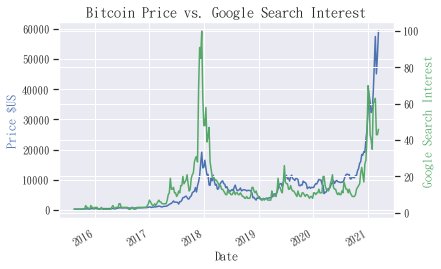

In [216]:
y1 = pd.Series(df_mc['BTCPrice'])
y2 = pd.Series(df_mc['Interest'])
x = pd.Series(df_mc.index.values)

fig, ax = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(x,y1,'b')
ax2.plot(x,y2,'g')
ax.set_ylabel("Price $US",color='b',fontsize=12)
ax2.set_ylabel("Google Search Interest",color='g',fontsize=12)
ax.grid(True)
plt.title("Bitcoin Price vs. Google Search Interest", fontsize=14)
ax.set_xlabel('Date', fontsize=12)
fig.autofmt_xdate()

plt.savefig('charts/btc_googlesearch_interest.png')
plt.show()

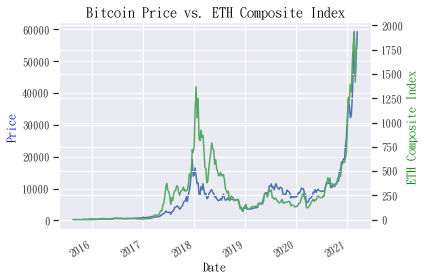

In [217]:
# BTC Price vs ETH
y2 = pd.Series(df_mc['ETHPrice'])

fig, ax = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()
plt.axis('normal')
ax.plot(x,y1, 'b',linewidth=1.5)
ax2.plot(x,y2, 'g',linewidth=1.5)
ax.set_ylabel("Price",fontsize=12,color='blue')
ax2.set_ylabel("ETH Composite Index",fontsize=12,color='green')
ax.grid(True)
plt.title("Bitcoin Price vs. ETH Composite Index", fontsize=14,color='black')
ax.set_xlabel('Date', fontsize=12, color='black')
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig('charts/btc_eth_price.png')
plt.show()

### Supplemental Information

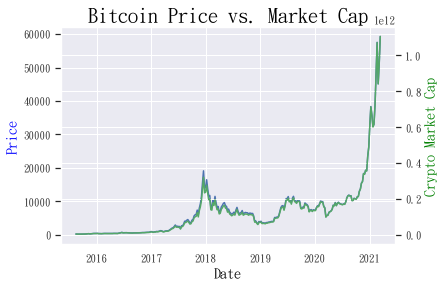

In [218]:
# BTC Price vs Crypto Market Cap
y2 = pd.Series(df_mc['BTC Market Cap'])

ax = plt.gca()
ax2 = ax.twinx()
plt.axis('normal')
ax.plot(x,y1, 'b',linewidth=1.5)
ax2.plot(x,y2, 'g',linewidth=1.5)
ax.set_ylabel("Price",fontsize=14,color='blue')
ax2.set_ylabel("Crypto Market Cap",fontsize=14,color='green')
# ax.grid(True)
plt.title("Bitcoin Price vs. Market Cap", fontsize=20,color='black')
ax.set_xlabel('Date', fontsize=14, color='black')
# plt.tight_layout()
plt.savefig('charts/btc_cryptomarketcap.png')
plt.show()

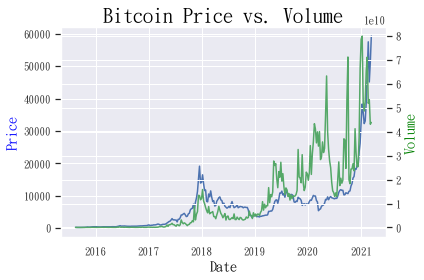

In [219]:
# BTC Price vs Volume
df_all = df_mc[:365]

y1 = pd.Series(df_all['BTCPrice'])
y2 = pd.Series(df_all['BTCVol'])
x = pd.Series(df_all.index.values)

ax = plt.gca()
ax2 = ax.twinx()
plt.axis('normal')
ax.plot(x,y1, 'b',linewidth=1.5)
ax2.plot(x,y2, 'g',linewidth=1.5)
ax.set_ylabel("Price",fontsize=14,color='blue')
ax2.set_ylabel("Volume",fontsize=14,color='green')
ax.grid(True)
plt.title("Bitcoin Price vs. Volume", fontsize=20,color='black')
ax.set_xlabel('Date', fontsize=14, color='black')
plt.tight_layout()
plt.savefig('charts/fig_BTC_Price_vs_Volume.png')
plt.show()

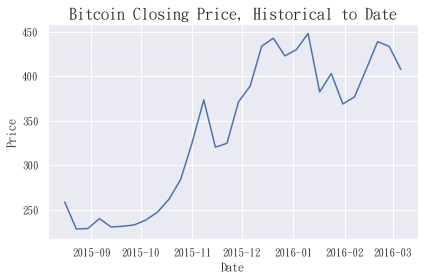

In [220]:
# shift 1 month (30 days)
df = df_mc[:30]
y = pd.Series(df['BTCPrice'])
x = pd.Series(df.index.values)

plt.plot(x,y)
plt.title("Bitcoin Closing Price, Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('charts/HistBTCPriceQuandl.png')
plt.show()

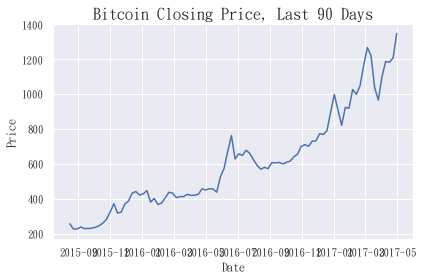

In [221]:
# # Hist BTC Price Quandl 90 days
df = df_mc[:90]
y = pd.Series(df['BTCPrice'])
x = pd.Series(df.index.values)

plt.plot(x,y)
plt.title("Bitcoin Closing Price, Last 90 Days",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('charts/90DBTCPriceQuandl.png')
plt.show()

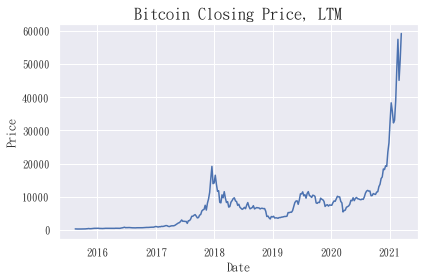

In [222]:
# shift 1 year (365 days)
df = df_mc[:365]
y = pd.Series(df['BTCPrice'])
x = pd.Series(df.index.values)

plt.plot(x,y)
plt.title("Bitcoin Closing Price, LTM",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('charts/LTMBTCPriceQuandl.png')
plt.show()

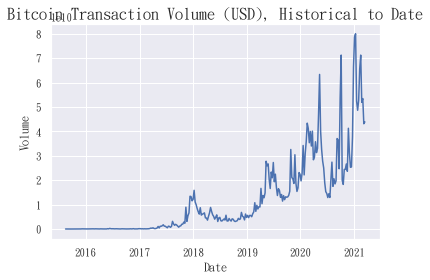

In [223]:
df = df_mc
y = pd.Series(df['BTCVol'])
x = pd.Series(df.index.values)

plt.plot(x,y)
plt.title("Bitcoin Transaction Volume (USD), Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.tight_layout()
plt.savefig('charts/HistBTCTxnVolQuandl.png')
plt.show()

<a id="BTCPriceLinearRegression"></a>
## Bitcoin Linear Regression: LR Analysis

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline

df_btc_eth = pd.read_pickle("data/Bitcoin/coinmarketcap_btc_eth_all.pkl")
df_btc_eth.head()

,Date,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,ETHLow,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday
0,2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,3.778049e+09,5.564509,22.052474,2.793760,2.798810,0.714725,0.753325,674188.0,4.548689e+07,-0.283259,17.632935,8,3,5
1,2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,3.838130e+09,5.580043,22.068251,0.706136,0.879810,0.629191,0.701897,532170.0,4.239957e+07,-0.353969,17.562649,8,3,6
2,2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,3.830352e+09,5.577728,22.066223,0.713989,0.729854,0.636546,0.708448,405283.0,4.281836e+07,-0.344679,17.572478,8,3,0
3,2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,3.917143e+09,5.599851,22.088628,0.708087,1.131410,0.663235,1.067860,1463100.0,6.456929e+07,0.065657,17.983249,8,3,1
4,2015-08-12,270.597992,270.673004,265.468994,266.376007,26815400.0,3.859888e+09,5.584909,22.073904,1.058750,1.289940,0.883608,1.217440,2150620.0,7.364501e+07,0.196750,18.114767,8,3,2


In [225]:
# load Interest from Google Trends, but limited date has data, only 217 days
df_mc = pd.read_pickle("data/Bitcoin/coinmarketcap_mc_all.pkl")
df_mc.head()

,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,...,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday,Interest,logInterest
2015-08-16,261.865997,262.440002,257.040985,258.506989,29717000.0,3.749502e+09,5.554923,22.044889,1.68435,1.69524,...,1.566030,3550790.0,9.490101e+07,0.448544,18.368345,8,3,6,2.0,0.693147
2015-08-23,230.376007,232.705002,225.580002,228.169006,18406600.0,3.315467e+09,5.430087,21.921864,1.37500,1.40970,...,1.352590,1589300.0,9.830035e+07,0.302021,18.403538,8,3,6,2.0,0.693147
2015-08-30,229.895004,232.067993,226.246994,228.761002,19412600.0,3.330085e+09,5.432678,21.926264,1.18299,1.36799,...,1.319270,1337650.0,9.609735e+07,0.277079,18.380872,8,3,6,2.0,0.693147
2015-09-06,234.869995,242.912003,234.681000,239.839996,25473700.0,3.497749e+09,5.479972,21.975385,1.33801,1.37364,...,1.295830,491968.0,9.458016e+07,0.259151,18.364958,9,3,6,2.0,0.693147
2015-09-13,235.242004,235.934998,229.332001,230.511993,18478800.0,3.367775e+09,5.440303,21.937518,1.04178,1.04270,...,0.936003,644138.0,6.848059e+07,-0.066137,18.042061,9,3,6,2.0,0.693147


In [226]:
# evaluate the correlation of the majority of features
df_all = df_mc
df_all.corr().sort_values('logBTCPrice')

,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,...,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday,Interest,logInterest
Quarter,-0.139988,-0.139602,-0.135174,-0.135757,-0.156613,-0.137484,-0.041273,-0.042058,-0.221655,-0.224087,...,-0.219672,-0.203297,-0.219167,-0.104236,-0.101549,0.972954,1.000000,NaN,-0.052013,-0.067654
Month,-0.129627,-0.128991,-0.124564,-0.125127,-0.149336,-0.127010,-0.032731,-0.033501,-0.216534,-0.219928,...,-0.215915,-0.200638,-0.215042,-0.096180,-0.093428,1.000000,0.972954,NaN,-0.039531,-0.057013
Interest,0.706586,0.712274,0.697473,0.705056,0.490217,0.687753,0.621744,0.612226,0.745245,0.752551,...,0.749293,0.479560,0.735395,0.584881,0.577661,-0.039531,-0.052013,NaN,1.000000,0.831547
ETHVol,0.775385,0.776630,0.773435,0.773478,0.949522,0.782201,0.647583,0.652581,0.573290,0.585398,...,0.583775,1.000000,0.630209,0.492842,0.507014,-0.200638,-0.203297,NaN,0.479560,0.545673
BTCVol,0.762005,0.763483,0.760233,0.759758,1.000000,0.766596,0.680327,0.685547,0.550969,0.558666,...,0.556870,0.949522,0.599350,0.515866,0.530986,-0.149336,-0.156613,NaN,0.490217,0.570268
ETHOpen,0.883270,0.882223,0.878370,0.880573,0.550969,0.869896,0.705270,0.696685,1.000000,0.998480,...,0.997240,0.573290,0.992780,0.688267,0.681002,-0.216534,-0.221655,NaN,0.745245,0.746931
ETH Market Cap,0.918056,0.918028,0.915395,0.917405,0.599350,0.909420,0.705575,0.698016,0.992780,0.994875,...,0.995741,0.630209,1.000000,0.670151,0.664802,-0.215042,-0.219167,NaN,0.735395,0.730366
ETHHigh,0.884646,0.884435,0.880275,0.882614,0.558666,0.871919,0.705908,0.697290,0.998480,1.000000,...,0.999379,0.585398,0.994875,0.688635,0.681332,-0.219928,-0.224087,NaN,0.752551,0.750589
ETHPrice,0.885704,0.885712,0.882219,0.884590,0.556870,0.873905,0.707512,0.698910,0.997240,0.999379,...,1.000000,0.583775,0.995741,0.689362,0.682126,-0.215915,-0.219672,NaN,0.749293,0.748810
ETHLow,0.887113,0.886684,0.883853,0.885768,0.552385,0.875147,0.710204,0.701681,0.998404,0.998338,...,0.998631,0.573532,0.994725,0.691533,0.684442,-0.210915,-0.215269,NaN,0.742014,0.746525


### The Core 3-Feature Model

In [227]:
df_all.columns

Index(['BTCOpen', 'BTCHigh', 'BTCLow', 'BTCPrice', 'BTCVol', 'BTC Market Cap',
       'logBTCPrice', 'logBTCMarketCap', 'ETHOpen', 'ETHHigh', 'ETHLow',
       'ETHPrice', 'ETHVol', 'ETH Market Cap', 'logETHPrice',
       'logETHMarketCap', 'Month', 'Quarter', 'Weekday', 'Interest',
       'logInterest'],
      dtype='object')

In [228]:
# Reducing to few key features
df_all = df_all[['logBTCPrice','logETHPrice','logInterest']]
df_all.corr().sort_values('logBTCPrice')

,logBTCPrice,logETHPrice,logInterest
logInterest,0.893970,0.878527,1.000000
logETHPrice,0.938559,1.000000,0.878527
logBTCPrice,1.000000,0.938559,0.893970


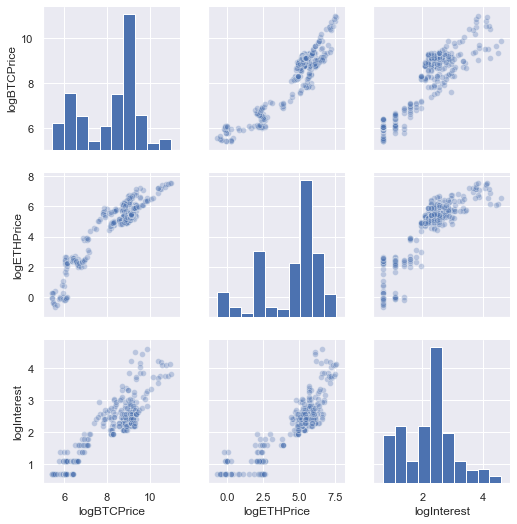

In [229]:
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(df_all,plot_kws={'alpha':0.3})
plt.savefig('charts/modelpairplot.png')

In [230]:
from sklearn.linear_model import LinearRegression

# SKLEARN
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X3 + X6 model
X = df[['logInterest','logETHPrice']]
# Choose the response variable(s)
y = df['logBTCPrice']

lr.fit(X,y)
# Print out the R^2 for the model against the full dataset
print(lr.score(X,y))
print(lr.intercept_)
print(lr.coef_)

0.9020121550672825
5.069437119406156
[0.46199864 0.45935255]


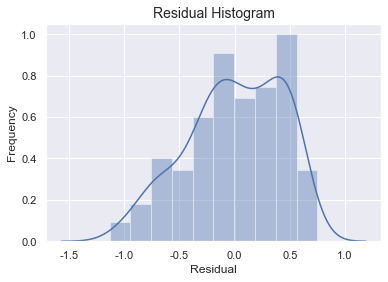

In [231]:
y_pred = lr.predict(X)

residuals = y - y_pred

sns.distplot(residuals);
plt.ylabel("Frequency",fontsize=12)
plt.xlabel("Residual",fontsize=12)
plt.title('Residual Histogram',fontsize=14)
plt.savefig('charts/residhist.png')

In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

# Fit the model against the training data
lr.fit(X_train, y_train)
# # Evaluate the model against the testing data
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8972946173326988
0.9079614821189269


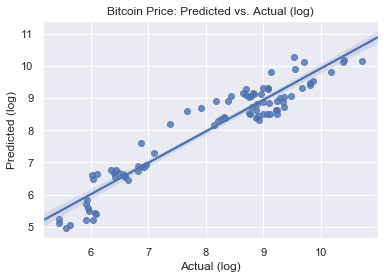

In [233]:
# sklearn prediction (logBTCPrice); seaborn
ax = sns.regplot(x=y_test,y=lr.predict(X_test), data=df)
ax.set(xlabel='Actual (log)', ylabel='Predicted (log)', title = 'Bitcoin Price: Predicted vs. Actual (log)')
plt.savefig('charts/logpredictedvsactual.png')

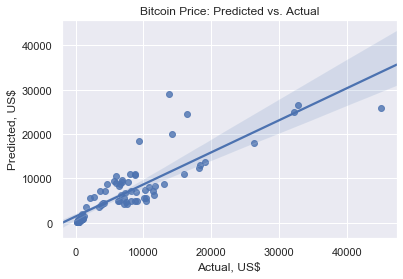

In [234]:
# sklearn prediction (BTCPrice); seaborn
ax = sns.regplot(x=np.exp(y_test),y=np.exp(lr.predict(X_test)), data=df)
ax.set(xlabel='Actual, US$', ylabel='Predicted, US$', title = 'Bitcoin Price: Predicted vs. Actual')
plt.savefig('charts/predictedvsactual.png')

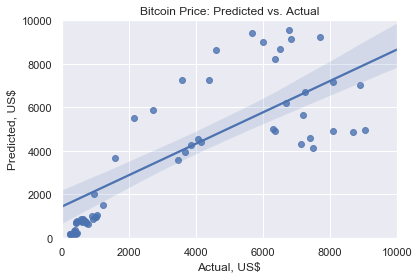

In [235]:
# limit x and y ticks to 10000 to see model prediction capability vs actual is near-aligned
ax = sns.regplot(x=np.exp(y_test),y=np.exp(lr.predict(X_test)), data=df)
ax.set(xlabel='Actual, US$', ylabel='Predicted, US$', title = 'Bitcoin Price: Predicted vs. Actual')
lim = 10000
plt.xlim(0, lim)
plt.ylim(0, lim)
plt.savefig('charts/predictedvsactuallimits.png')

### Feature Analysis

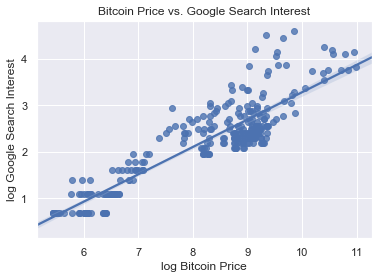

In [236]:
# GOOGLE SEARCH INTEREST
x = df['logBTCPrice']
y = df['logInterest']

ax = sns.regplot(x,y, data=df)
ax.set(xlabel='log Bitcoin Price', ylabel='log Google Search Interest', title = 'Bitcoin Price vs. Google Search Interest')
plt.savefig('charts/interestvsbtcprice.png')

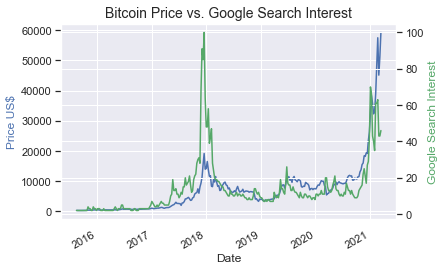

In [237]:
y1 = pd.Series(df_mc['BTCPrice'])
y2 = pd.Series(df_mc['Interest'])
x = pd.Series(df_mc.index.values)

fig, _ = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(x,y1,'b')
ax2.plot(x,y2,'g')
ax.set_ylabel("Price US$",color='b',fontsize=12)
ax2.set_ylabel("Google Search Interest",color='g',fontsize=12)
ax.grid(True)
plt.title("Bitcoin Price vs. Google Search Interest", fontsize=14)
ax.set_xlabel('Date', fontsize=12)
fig.autofmt_xdate()

plt.savefig('charts/googlesearchinterest.png')
plt.show()

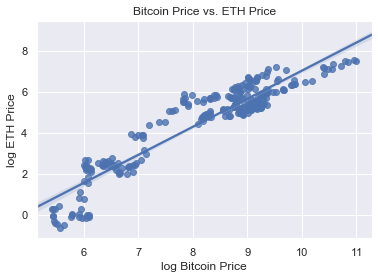

In [238]:
# FEATURE ANALYSIS: ETH COMPOSITE INDEX
x = df_mc['logBTCPrice']
y = df_mc['logETHPrice']

ax = sns.regplot(x,y, data=df)
ax.set(xlabel='log Bitcoin Price', ylabel='log ETH Price', title = 'Bitcoin Price vs. ETH Price')
plt.savefig('charts/ethvsbtcprice.png')

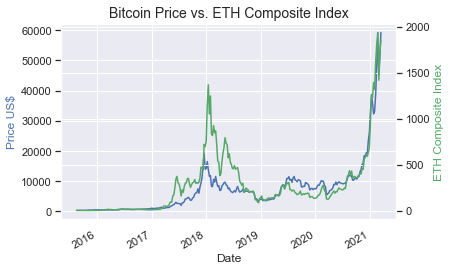

In [239]:
y1 = pd.Series(df_mc['BTCPrice'])
y2 = pd.Series(df_mc['ETHPrice'])
x = pd.Series(df_mc.index.values)

fig, _ = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(x,y1,'b')
ax2.plot(x,y2,'g')
ax.set_ylabel("Price US$",color='b',fontsize=12)
ax2.set_ylabel("ETH Composite Index",color='g',fontsize=12)
# ax.grid(True)
plt.title("Bitcoin Price vs. ETH Composite Index", fontsize=14)
ax.set_xlabel('Date', fontsize=12)
fig.autofmt_xdate()
# ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.savefig('charts/eth_btc.png')
plt.show()

### Regularization
Regularization has been considered but not included in the model.  The model is highly correlated with the price of 
Bitcoin, achieved with only 3 features.  Even with a further reduction of features the model remains highly correlated.  Per the simply RidgeCV analysis below, the model is also not overfit.

However, given the large Condition Number and resulting Multicollinearity, regularization may be used to further address this issue.  

In [240]:
# REGULARIZATION
from sklearn.linear_model import RidgeCV

rcv = RidgeCV(cv=10)

rcv.fit(X_train, y_train)
print(rcv.score(X_train,y_train))
rcv.score(X_test, y_test)

0.8969688786890511


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9081074991759973

### Homework
- Google Trends has fragment problem on continuous date, what do you think?
- What if using real google search result (post count)?
- try use David's xlsx ./data/Bitcoin/BTCGoogleSearch.xlsx

In [241]:
# Hint down below
import pandas as pd

df_gsearch = pd.read_excel("./data/Bitcoin/BTCGoogleSearch.xlsx")
df_gsearch.head()

,start_date,end_date,post_count,diff
0,2015-08-07,2015-08-07,150000,150000
1,2015-08-08,2015-08-08,152000,2000
2,2015-08-09,2015-08-09,153000,1000
3,2015-08-10,2015-08-10,150000,-3000
4,2015-08-11,2015-08-11,152000,2000


In [242]:
df_gsearch['log_post_count'] = df_gsearch['post_count'].apply(to_log)
df_gsearch['log_diff'] = df_gsearch['diff'].apply(to_log)
if 'start_date' in df_gsearch.columns:
    df_gsearch = df_gsearch.rename(columns={'start_date': 'Date'})
df_gsearch.head()

,Date,end_date,post_count,diff,log_post_count,log_diff
0,2015-08-07,2015-08-07,150000,150000,11.918391,11.918391
1,2015-08-08,2015-08-08,152000,2000,11.931636,7.600902
2,2015-08-09,2015-08-09,153000,1000,11.938193,6.907755
3,2015-08-10,2015-08-10,150000,-3000,11.918391,NaN
4,2015-08-11,2015-08-11,152000,2000,11.931636,7.600902


In [243]:
stay_col = ['Date', 'post_count', 'log_post_count', 'diff', 'log_diff']
df_gsearch = df_gsearch[stay_col]
df_gsearch['Date'] = df_gsearch['Date'].astype('datetime64')
df_gsearch.to_pickle('data/Bitcoin/googlesearchpostcount.pkl')
df_gsearch.head()

,Date,post_count,log_post_count,diff,log_diff
0,2015-08-07,150000,11.918391,150000,11.918391
1,2015-08-08,152000,11.931636,2000,7.600902
2,2015-08-09,153000,11.938193,1000,6.907755
3,2015-08-10,150000,11.918391,-3000,NaN
4,2015-08-11,152000,11.931636,2000,7.600902


In [244]:
import pandas as pd
import numpy as np

df_btc_eth = pd.read_pickle("data/Bitcoin/coinmarketcap_btc_eth_all.pkl")
# df_btc_eth = df_btc_eth.set_index('Date')
df_btc_eth.head()

,Date,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,ETHLow,ETHPrice,ETHVol,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday
0,2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,3.778049e+09,5.564509,22.052474,2.793760,2.798810,0.714725,0.753325,674188.0,4.548689e+07,-0.283259,17.632935,8,3,5
1,2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,3.838130e+09,5.580043,22.068251,0.706136,0.879810,0.629191,0.701897,532170.0,4.239957e+07,-0.353969,17.562649,8,3,6
2,2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,3.830352e+09,5.577728,22.066223,0.713989,0.729854,0.636546,0.708448,405283.0,4.281836e+07,-0.344679,17.572478,8,3,0
3,2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,3.917143e+09,5.599851,22.088628,0.708087,1.131410,0.663235,1.067860,1463100.0,6.456929e+07,0.065657,17.983249,8,3,1
4,2015-08-12,270.597992,270.673004,265.468994,266.376007,26815400.0,3.859888e+09,5.584909,22.073904,1.058750,1.289940,0.883608,1.217440,2150620.0,7.364501e+07,0.196750,18.114767,8,3,2


In [245]:
print(df_btc_eth.dtypes)

Date               datetime64[ns]
BTCOpen                   float64
BTCHigh                   float64
BTCLow                    float64
BTCPrice                  float64
BTCVol                    float64
BTC Market Cap            float64
logBTCPrice               float64
logBTCMarketCap           float64
ETHOpen                   float64
ETHHigh                   float64
ETHLow                    float64
ETHPrice                  float64
ETHVol                    float64
ETH Market Cap            float64
logETHPrice               float64
logETHMarketCap           float64
Month                       int64
Quarter                     int64
Weekday                     int64
dtype: object


In [246]:
df_gsearch = pd.read_pickle('data/Bitcoin/googlesearchpostcount.pkl')
df_gsearch.head()

,Date,post_count,log_post_count,diff,log_diff
0,2015-08-07,150000,11.918391,150000,11.918391
1,2015-08-08,152000,11.931636,2000,7.600902
2,2015-08-09,153000,11.938193,1000,6.907755
3,2015-08-10,150000,11.918391,-3000,NaN
4,2015-08-11,152000,11.931636,2000,7.600902


In [247]:
print(df_gsearch.dtypes)

Date              datetime64[ns]
post_count                 int64
log_post_count           float64
diff                       int64
log_diff                 float64
dtype: object


In [248]:
df_btc_eth.shape[0]

2050

In [249]:
df_gsearch.shape[0]

1520

In [250]:
df_m = df_btc_eth.merge(df_gsearch, how='inner', on='Date').fillna(0)
df_m = df_m.loc[(df_m['log_post_count'] > 0)]
df_m.to_pickle('data/Bitcoin/coinmarketcap_m_all.pkl')
df_m.head()

,Date,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,...,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday,post_count,log_post_count,diff,log_diff
0,2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,3.778049e+09,5.564509,22.052474,2.793760,...,4.548689e+07,-0.283259,17.632935,8,3,5,152000,11.931636,2000,7.600902
1,2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,3.838130e+09,5.580043,22.068251,0.706136,...,4.239957e+07,-0.353969,17.562649,8,3,6,153000,11.938193,1000,6.907755
2,2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,3.830352e+09,5.577728,22.066223,0.713989,...,4.281836e+07,-0.344679,17.572478,8,3,0,150000,11.918391,-3000,0.000000
3,2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,3.917143e+09,5.599851,22.088628,0.708087,...,6.456929e+07,0.065657,17.983249,8,3,1,152000,11.931636,2000,7.600902
4,2015-08-12,270.597992,270.673004,265.468994,266.376007,26815400.0,3.859888e+09,5.584909,22.073904,1.058750,...,7.364501e+07,0.196750,18.114767,8,3,2,153000,11.938193,1000,6.907755


In [251]:
if 'Date' in df_m.columns:
    df_m = df_m.set_index('Date')
df_m.head()

,BTCOpen,BTCHigh,BTCLow,BTCPrice,BTCVol,BTC Market Cap,logBTCPrice,logBTCMarketCap,ETHOpen,ETHHigh,...,ETH Market Cap,logETHPrice,logETHMarketCap,Month,Quarter,Weekday,post_count,log_post_count,diff,log_diff
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,3.778049e+09,5.564509,22.052474,2.793760,2.798810,...,4.548689e+07,-0.283259,17.632935,8,3,5,152000,11.931636,2000,7.600902
2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,3.838130e+09,5.580043,22.068251,0.706136,0.879810,...,4.239957e+07,-0.353969,17.562649,8,3,6,153000,11.938193,1000,6.907755
2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,3.830352e+09,5.577728,22.066223,0.713989,0.729854,...,4.281836e+07,-0.344679,17.572478,8,3,0,150000,11.918391,-3000,0.000000
2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,3.917143e+09,5.599851,22.088628,0.708087,1.131410,...,6.456929e+07,0.065657,17.983249,8,3,1,152000,11.931636,2000,7.600902
2015-08-12,270.597992,270.673004,265.468994,266.376007,26815400.0,3.859888e+09,5.584909,22.073904,1.058750,1.289940,...,7.364501e+07,0.196750,18.114767,8,3,2,153000,11.938193,1000,6.907755


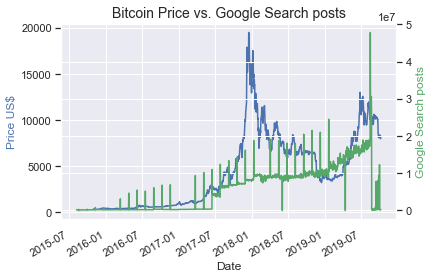

In [252]:
y1 = pd.Series(df_m['BTCPrice'])
y2 = pd.Series(df_m['post_count'])
x = pd.Series(df_m.index.values)

fig, _ = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(x,y1,'b')
ax2.plot(x,y2,'g')
ax.set_ylabel("Price US$",color='b',fontsize=12)
ax2.set_ylabel("Google Search posts",color='g',fontsize=12)
ax.grid(True)
plt.title("Bitcoin Price vs. Google Search posts", fontsize=14)
ax.set_xlabel('Date', fontsize=12)
fig.autofmt_xdate()

plt.savefig('charts/googlesearchpost.png')
plt.show()

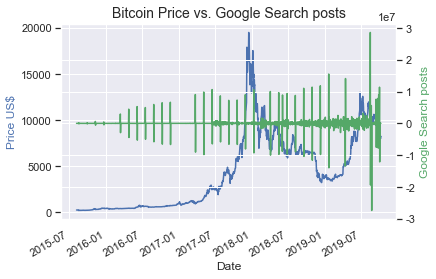

In [253]:
y1 = pd.Series(df_m['BTCPrice'])
y2 = pd.Series(df_m['diff'])
x = pd.Series(df_m.index.values)

fig, _ = plt.subplots()

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(x,y1,'b')
ax2.plot(x,y2,'g')
ax.set_ylabel("Price US$",color='b',fontsize=12)
ax2.set_ylabel("Google Search posts",color='g',fontsize=12)
ax.grid(True)
plt.title("Bitcoin Price vs. Google Search posts", fontsize=14)
ax.set_xlabel('Date', fontsize=12)
fig.autofmt_xdate()

plt.savefig('charts/googlesearchpost_diff.png')
plt.show()

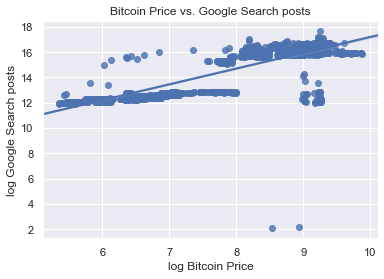

In [254]:
# GOOGLE SEARCH posts
x = df_m['logBTCPrice']
y = df_m['log_post_count']

ax = sns.regplot(x,y, data=df)
ax.set(xlabel='log Bitcoin Price', ylabel='log Google Search posts', title = 'Bitcoin Price vs. Google Search posts')
plt.savefig('charts/postvsbtcprice.png')